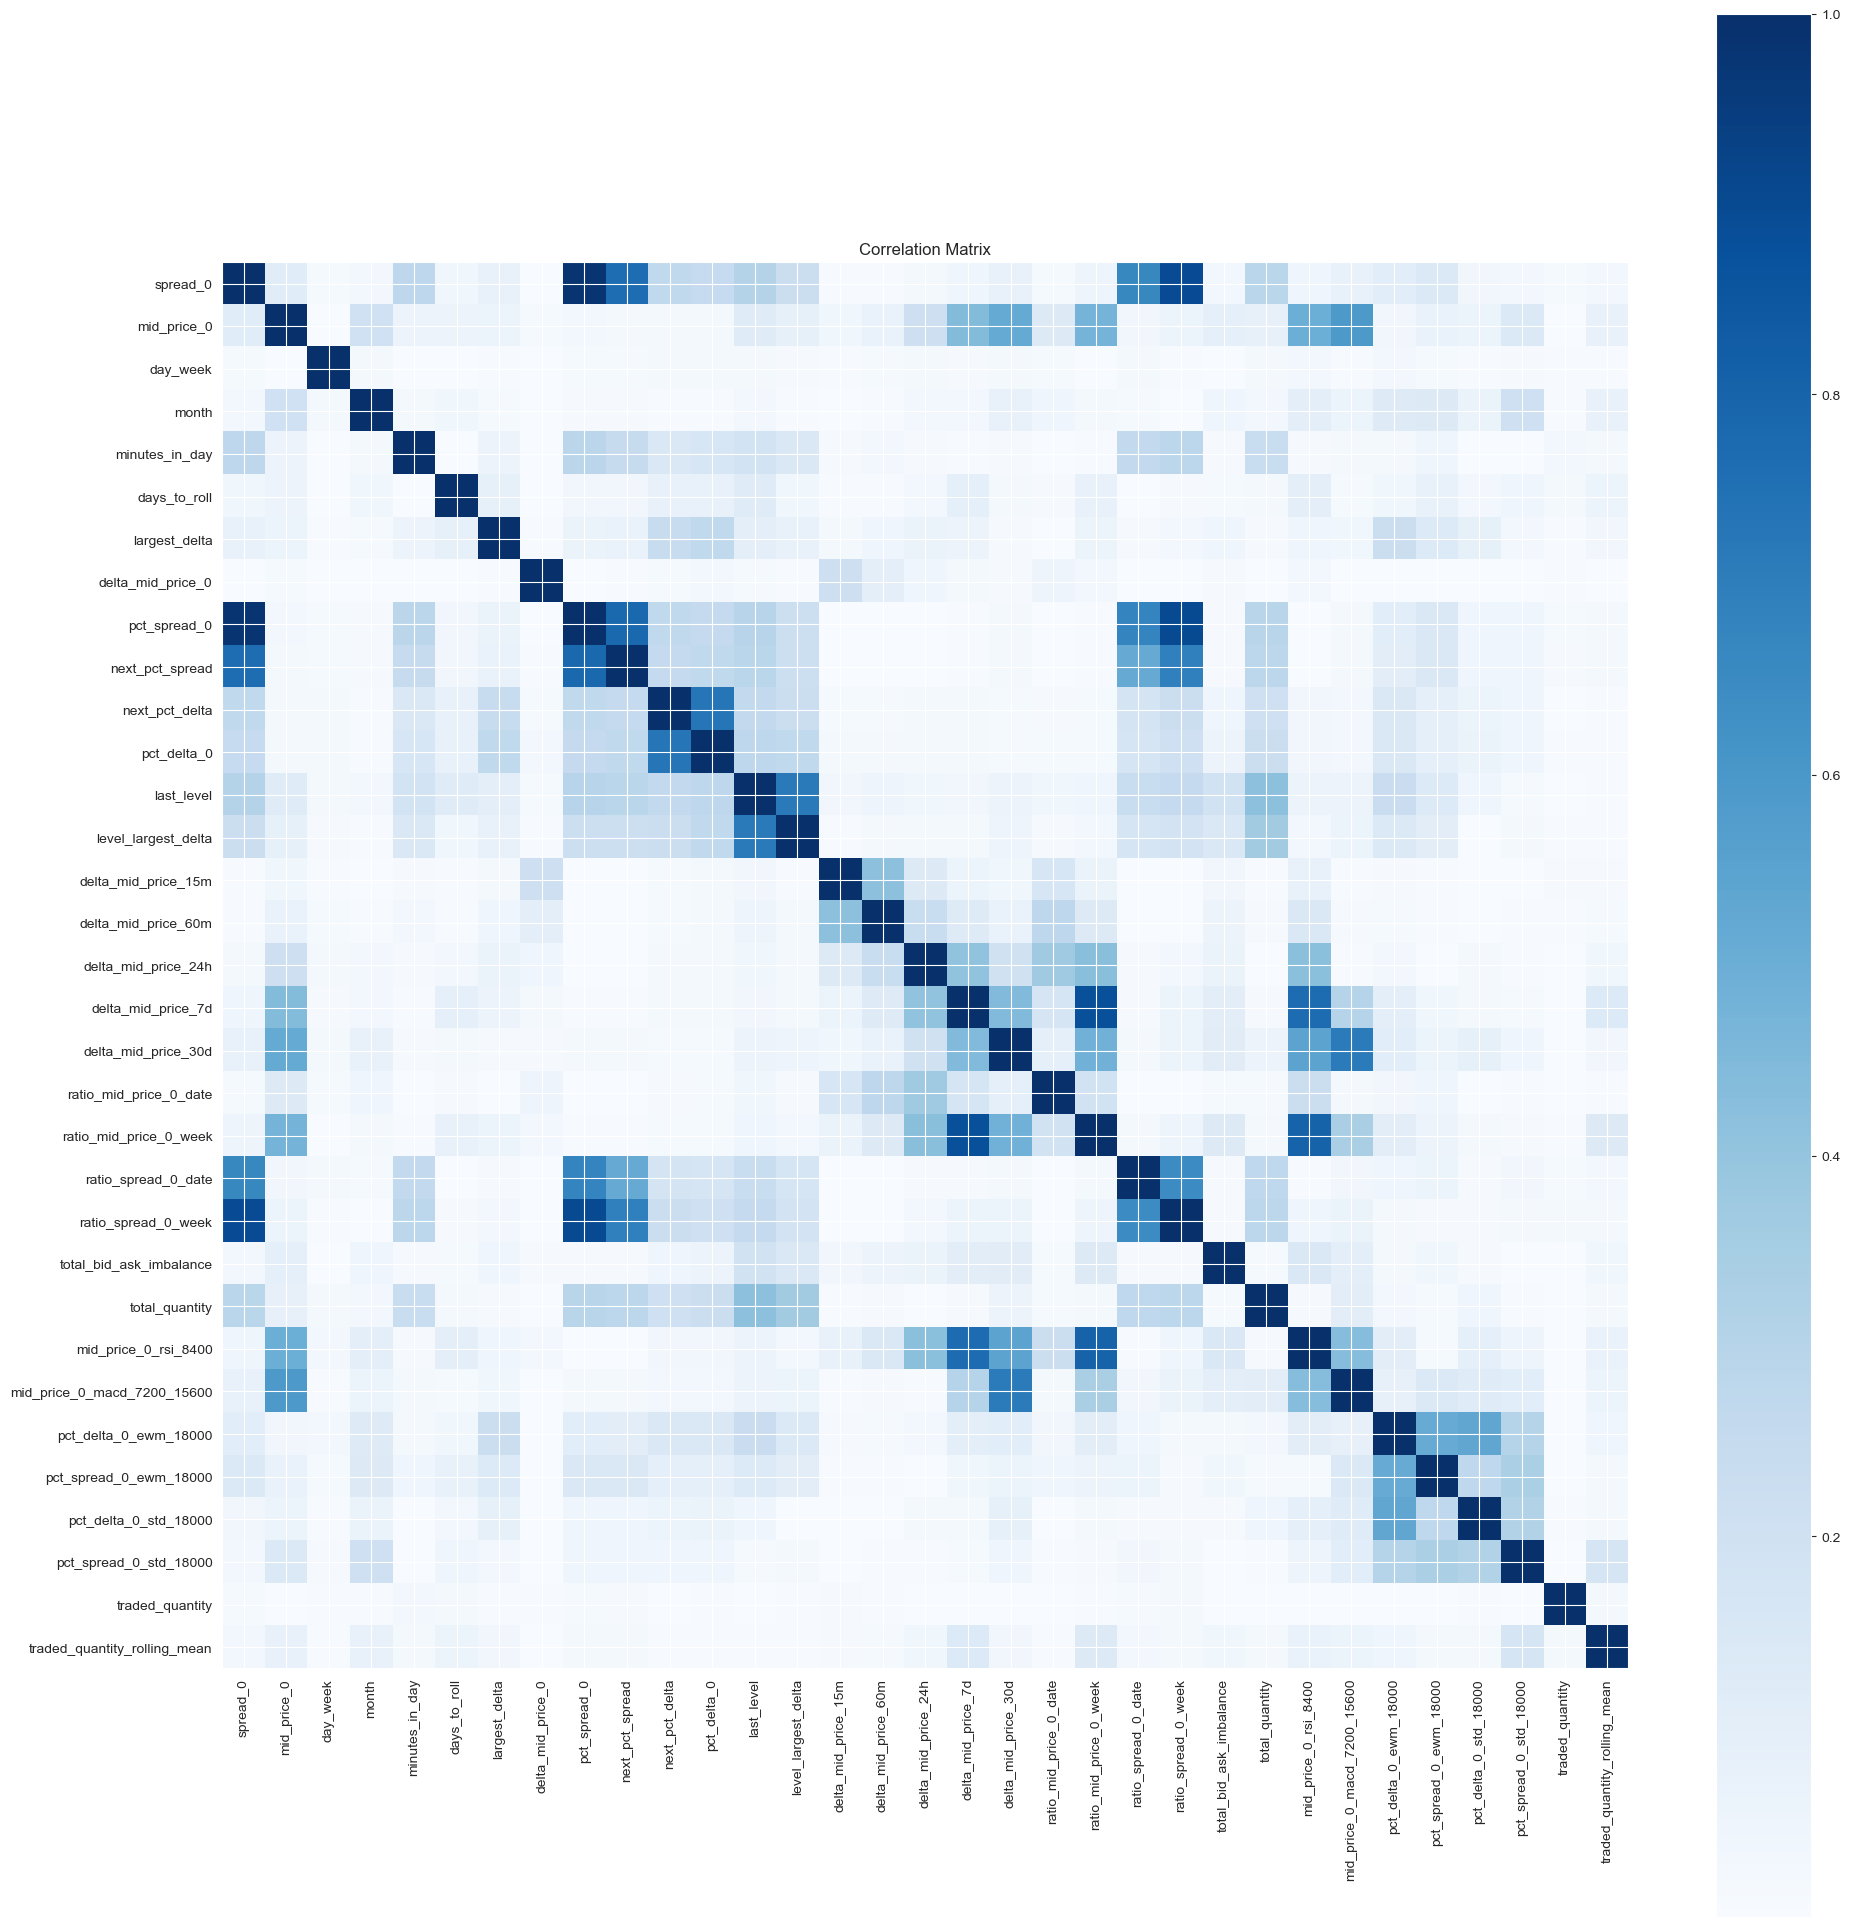

In [8]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

parquet_path = "C:/Users/Riccardo/Documents/TTF_all/TTF_M3/train.parquet"
df = pl.read_parquet(parquet_path).drop('year')
df2 = df.select([col for col in df.columns if col not in ['timestamp', 'prod']])
corr_matrix = df2.corr()
corr_matrix = corr_matrix.select(pl.col(corr_matrix.columns).abs())

plt.figure(figsize=(20, 20))
plt.imshow(corr_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()

num_cols = corr_matrix.columns
ticks = np.arange(len(num_cols))
plt.xticks(ticks, num_cols, rotation=90)
plt.yticks(ticks, num_cols)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

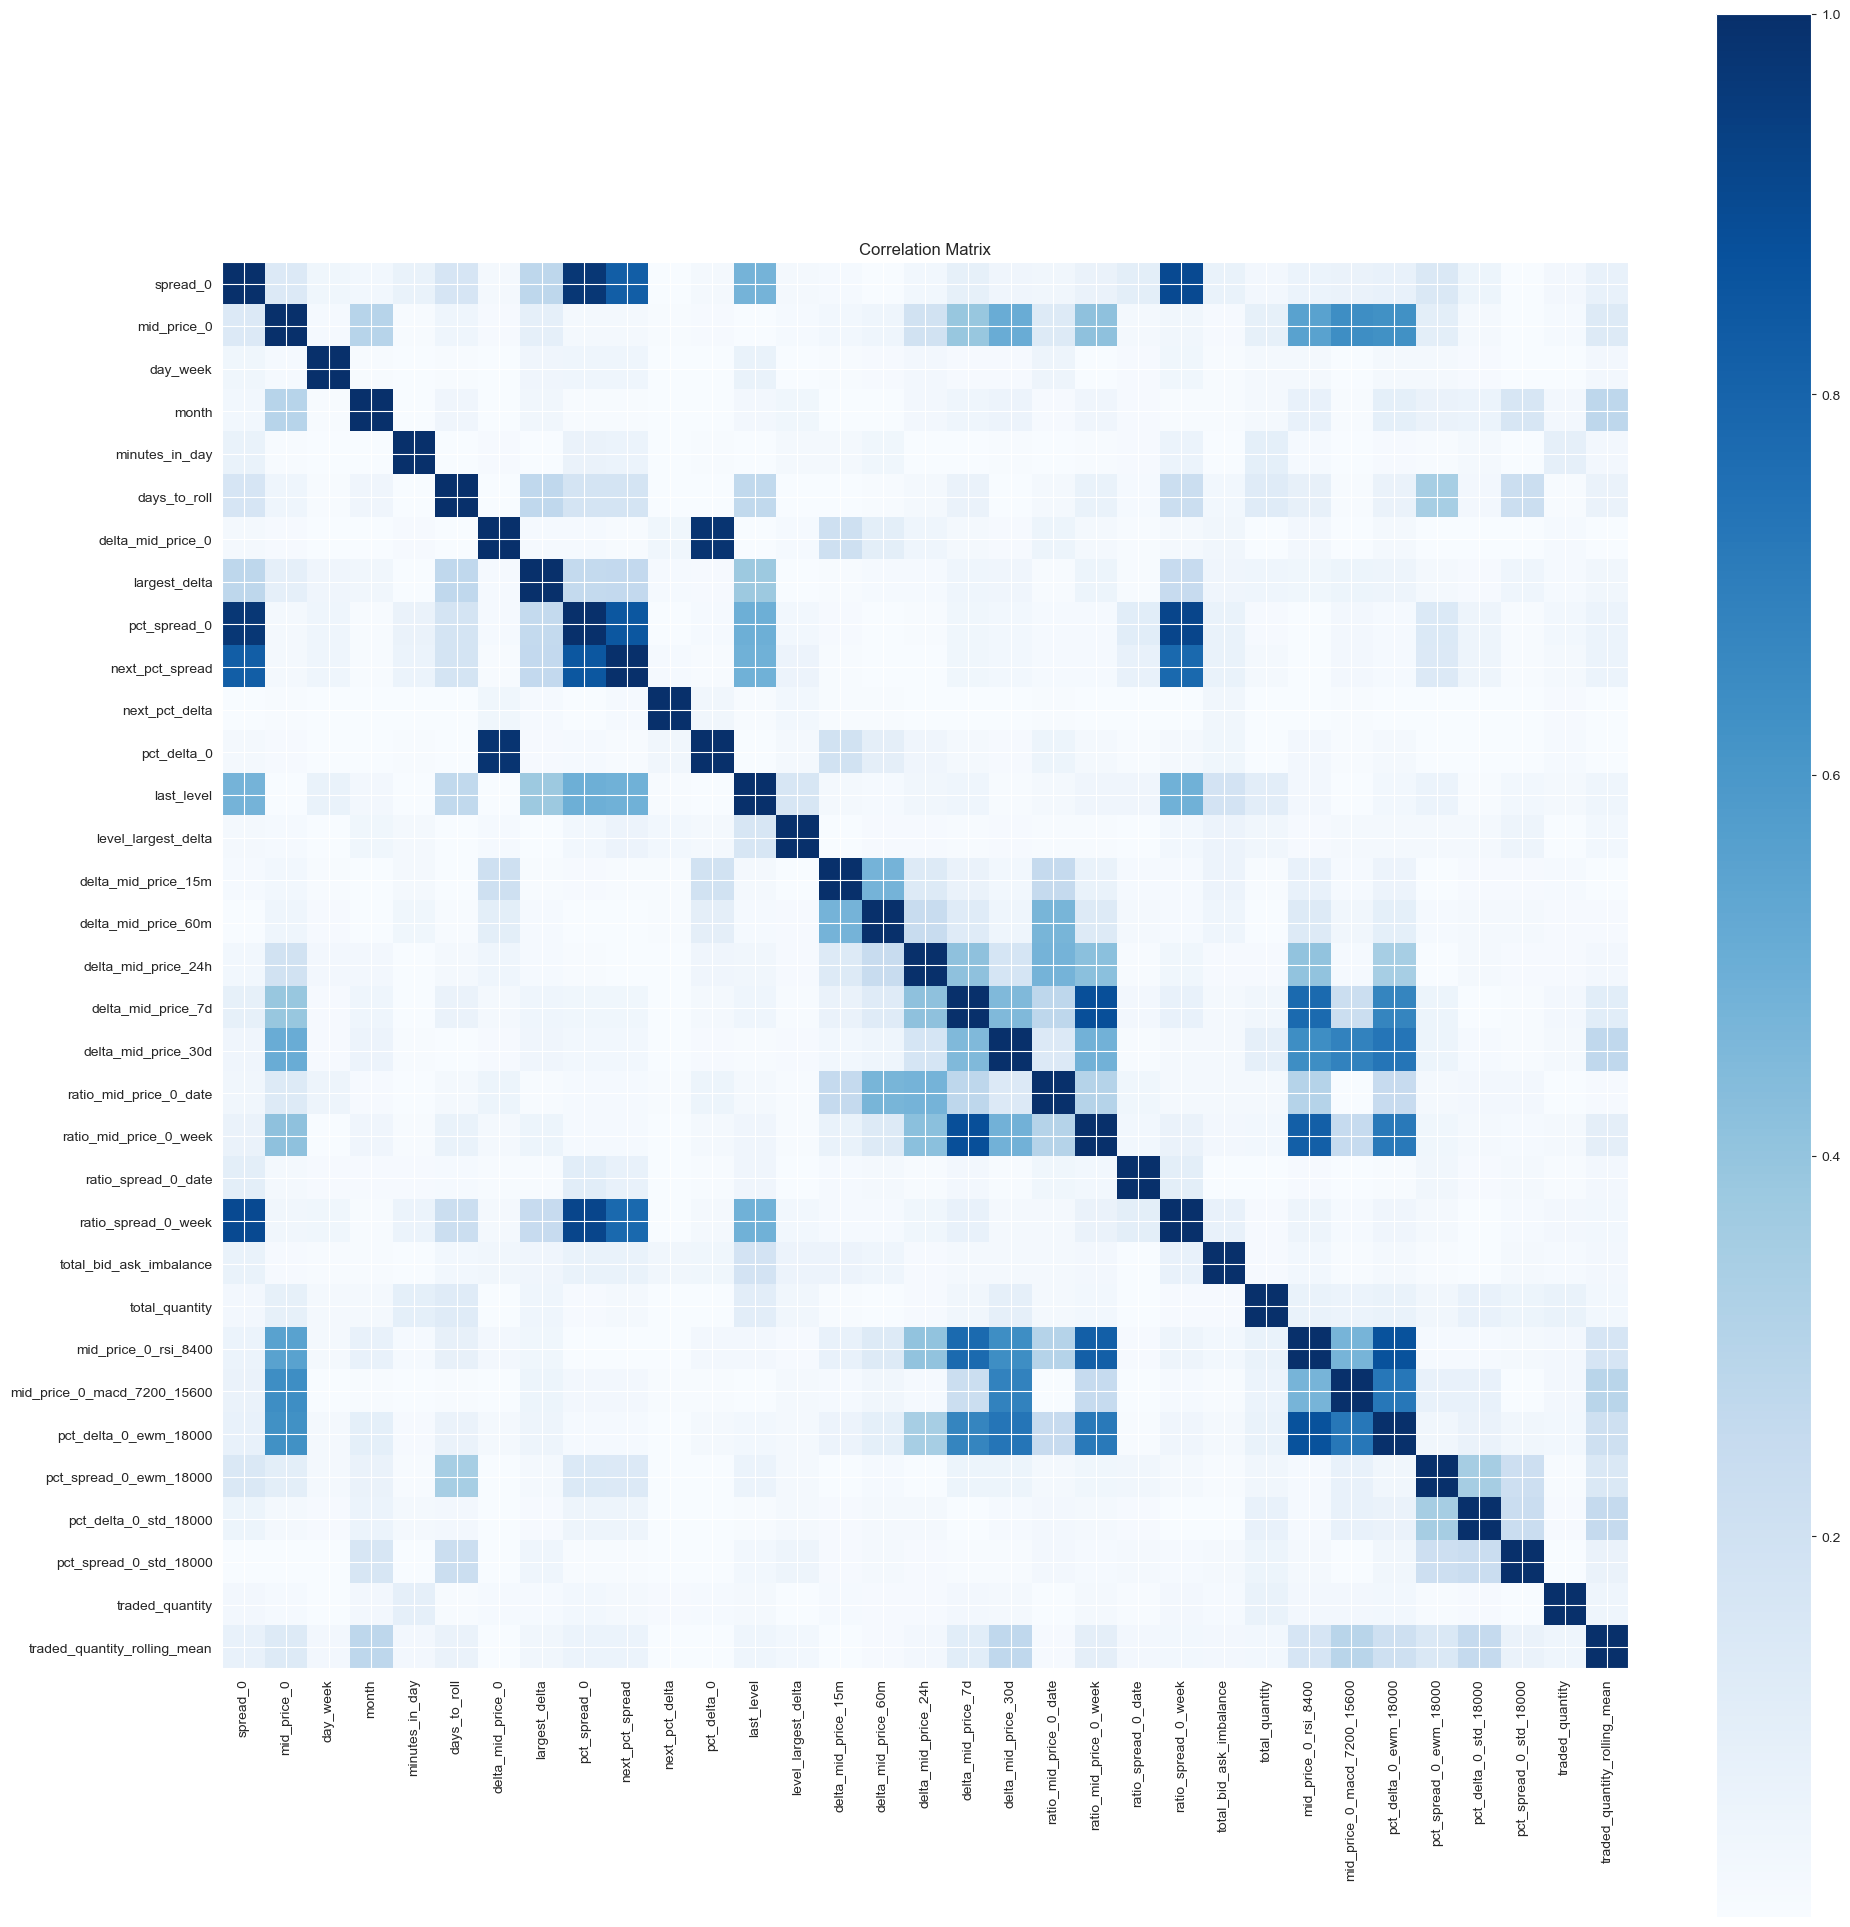

In [9]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

parquet_path = "C:/Users/Riccardo/Documents/TTF_all/TTF_M1/train.parquet"
df = pl.read_parquet(parquet_path).drop('year')
df2 = df.select([col for col in df.columns if col not in ['timestamp', 'prod']])
corr_matrix = df2.corr()
corr_matrix = corr_matrix.select(pl.col(corr_matrix.columns).abs())

plt.figure(figsize=(20, 20))
plt.imshow(corr_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()

num_cols = corr_matrix.columns
ticks = np.arange(len(num_cols))
plt.xticks(ticks, num_cols, rotation=90)
plt.yticks(ticks, num_cols)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

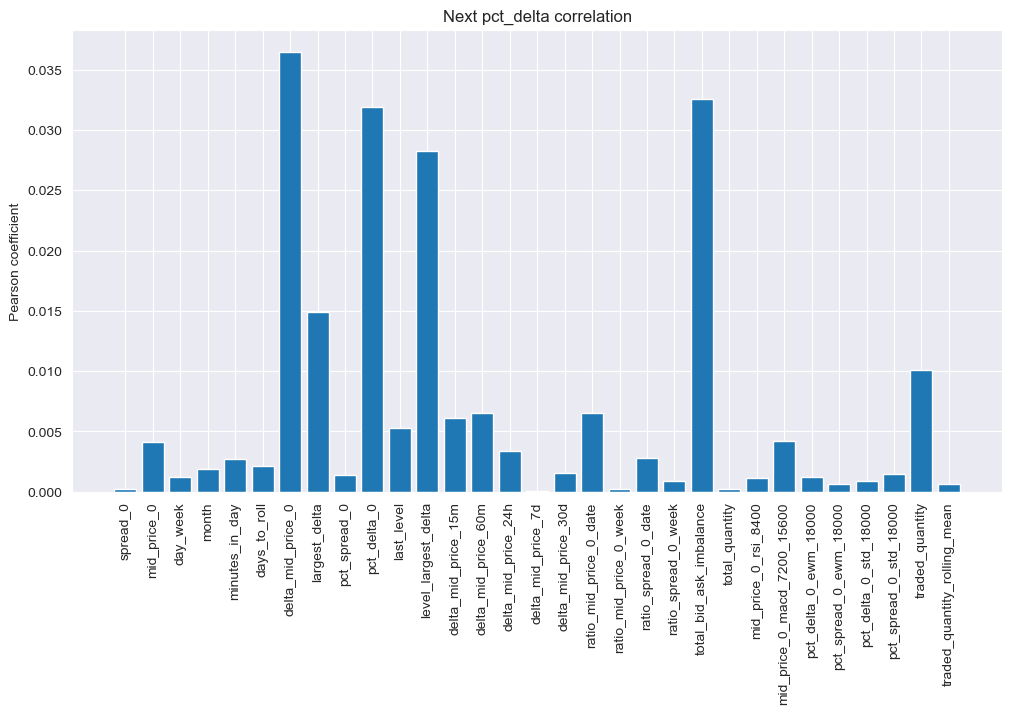

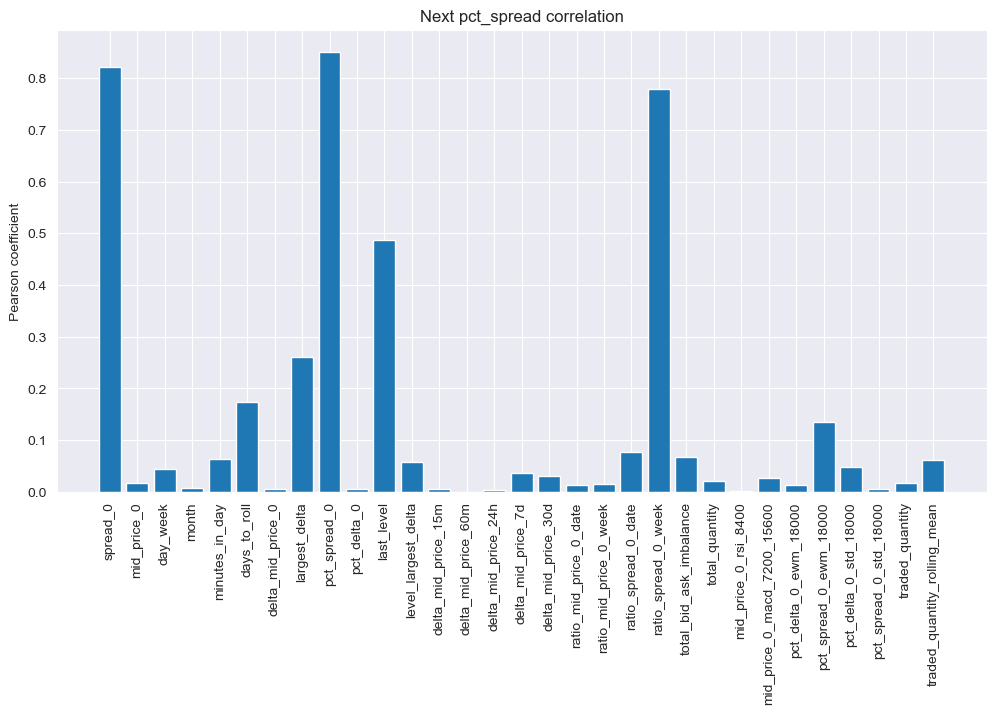

In [10]:
next_pct_delta_corr = corr_matrix.select(pl.col('next_pct_delta'))['next_pct_delta'].to_list()
next_pct_spread_corr = corr_matrix.select(pl.col('next_pct_spread'))['next_pct_spread'].to_list()

to_remove = [df2.columns.index('next_pct_delta'), df2.columns.index('next_pct_spread')]
to_remove.sort(reverse=True)

for index in to_remove:
    next_pct_delta_corr.pop(index)
    next_pct_spread_corr.pop(index)
    
y_columns = ['next_pct_delta', 'next_pct_spread']
x_columns = [col for col in df2.columns if col not in y_columns]

plt.figure(figsize=(12, 6))
plt.bar(x_columns, next_pct_delta_corr)
plt.title('Next pct_delta correlation')
plt.ylabel('Pearson coefficient')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(x_columns, next_pct_spread_corr)
plt.title('Next pct_spread correlation')
plt.ylabel('Pearson coefficient')
plt.xticks(rotation=90)
plt.show()


In [6]:
df56 = df.group_by_dynamic("timestamp", every='1m').agg(pl.all().first())
df56

shape: (747_811, 35)
┌────────────┬────────┬──────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ timestamp  ┆ prod   ┆ spread_0 ┆ mid_price_ ┆ … ┆ pct_delta_ ┆ pct_sprea ┆ traded_qu ┆ traded_qu │
│ ---        ┆ ---    ┆ ---      ┆ 0          ┆   ┆ 0_std_1800 ┆ d_0_std_1 ┆ antity    ┆ antity_ro │
│ datetime[μ ┆ str    ┆ f64      ┆ ---        ┆   ┆ 0          ┆ 8000      ┆ ---       ┆ lling_mea │
│ s]         ┆        ┆          ┆ f64        ┆   ┆ ---        ┆ ---       ┆ f64       ┆ n         │
│            ┆        ┆          ┆            ┆   ┆ f64        ┆ f64       ┆           ┆ ---       │
│            ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆ f64       │
╞════════════╪════════╪══════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2020-01-15 ┆ Apr-20 ┆ 0.0      ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 07:56:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2020-01-15 ┆ Apr-20 ┆ 0.0      ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 07:57:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2020-01-15 ┆ Apr-20 ┆ 0.0      ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 07:58:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2020-01-15 ┆ Apr-20 ┆ 0.0      ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 07:59:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2020-01-15 ┆ Apr-20 ┆ 0.0      ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ 08:00:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ …          ┆ …      ┆ …        ┆ …          ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-12-31 ┆ Mar-25 ┆ 2.725993 ┆ 1.839428   ┆ … ┆ 1.338661   ┆ 1.581703  ┆ -0.508707 ┆ 2.231301  │
│ 16:56:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2024-12-31 ┆ Mar-25 ┆ 0.551002 ┆ 1.815637   ┆ … ┆ 1.336448   ┆ 1.581601  ┆ 0.0       ┆ 2.230946  │
│ 16:57:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2024-12-31 ┆ Mar-25 ┆ 0.383639 ┆ 1.795948   ┆ … ┆ 1.340022   ┆ 1.581105  ┆ -0.097421 ┆ 2.229793  │
│ 16:58:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2024-12-31 ┆ Mar-25 ┆ 0.885537 ┆ 1.817148   ┆ … ┆ 1.34807    ┆ 1.580894  ┆ 0.51935   ┆ 2.231883  │
│ 16:59:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2024-12-31 ┆ Mar-25 ┆ 0.885482 ┆ 1.816878   ┆ … ┆ 1.355847   ┆ 1.580954  ┆ 0.0       ┆ 2.231527  │
│ 17:00:00   ┆        ┆          ┆            ┆   ┆            ┆           ┆           ┆           │
└────────────┴────────┴──────────┴────────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [4]:
frame = pl.read_csv('C:/Users/Riccardo/Documents/TTF_all/TTF_M1/mismatches.csv')
frame

shape: (836_175, 83)
┌───────┬───────┬───────┬───────┬───┬─────────────────┬────────────────┬────────────────┬──────────┐
│ bid_0 ┆ bid_1 ┆ bid_2 ┆ bid_3 ┆ … ┆ ask_quantity_7_ ┆ ask_quantity_8 ┆ ask_quantity_9 ┆ prod_df2 │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆   ┆ df2             ┆ _df2           ┆ _df2           ┆ ---      │
│ f64   ┆ f64   ┆ f64   ┆ f64   ┆   ┆ ---             ┆ ---            ┆ ---            ┆ str      │
│       ┆       ┆       ┆       ┆   ┆ i64             ┆ i64            ┆ i64            ┆          │
╞═══════╪═══════╪═══════╪═══════╪═══╪═════════════════╪════════════════╪════════════════╪══════════╡
│ 11.0  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Feb-20   │
│ 11.0  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Feb-20   │
│ 11.0  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Feb-20   │
│ 11.0  ┆ 11.0  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Feb-20   │
│ 11.0  ┆ 11.0  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Feb-20   │
│ …     ┆ …     ┆ …     ┆ …     ┆ … ┆ …               ┆ …              ┆ …              ┆ …        │
│ 41.5  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Apr-25   │
│ 41.5  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Apr-25   │
│ 41.5  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Apr-25   │
│ 41.5  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Apr-25   │
│ 41.5  ┆ null  ┆ null  ┆ null  ┆ … ┆ null            ┆ null           ┆ null           ┆ Apr-25   │
└───────┴───────┴───────┴───────┴───┴─────────────────┴────────────────┴────────────────┴──────────┘

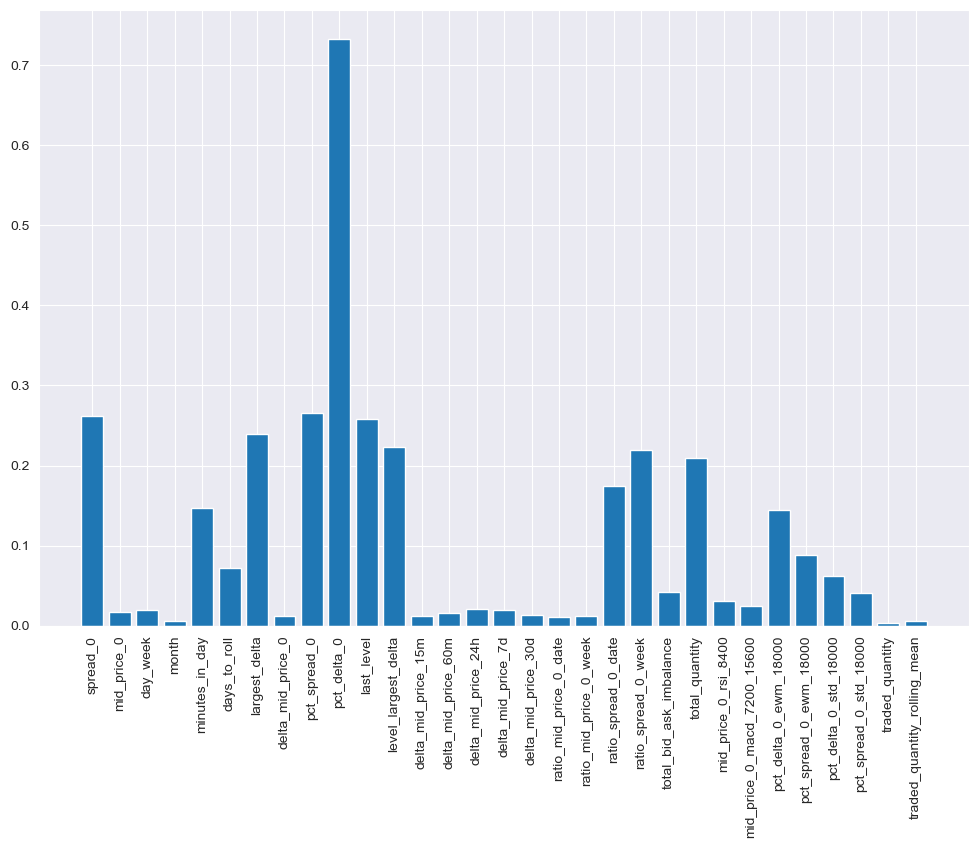

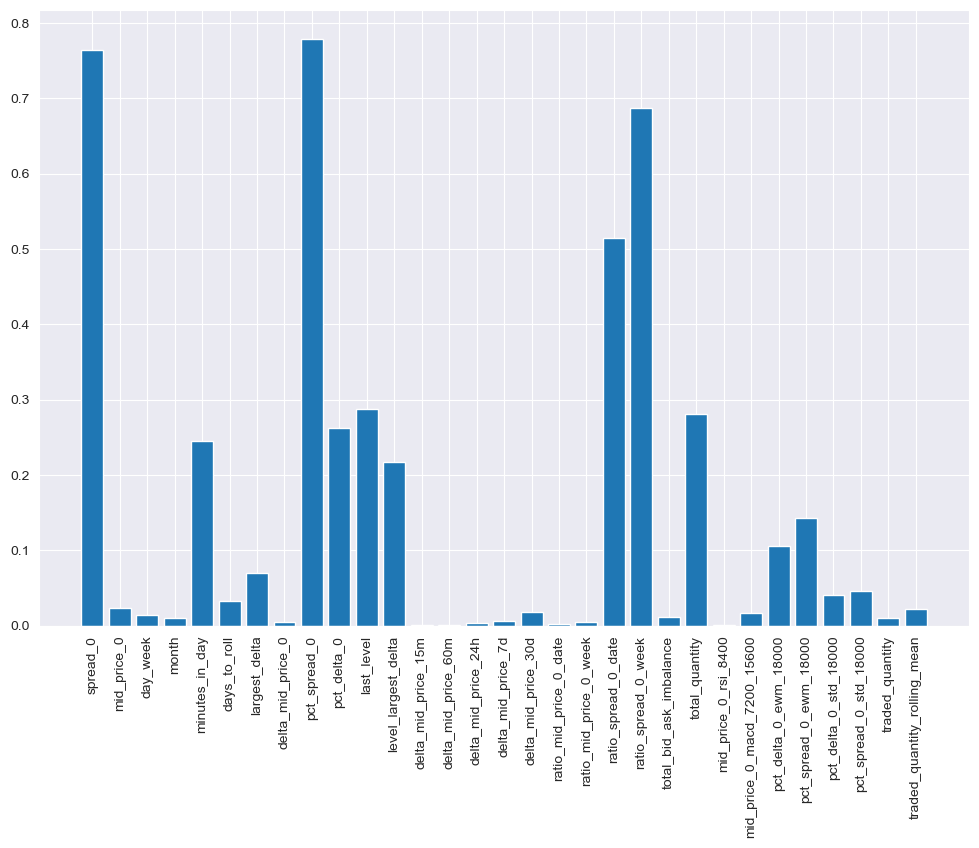

In [2]:
next_pct_delta_corr = corr_matrix.select(pl.col('next_pct_delta'))['next_pct_delta'].to_list()
next_pct_spread_corr = corr_matrix.select(pl.col('next_pct_spread'))['next_pct_spread'].to_list()

to_remove = [df2.columns.index('next_pct_delta'), df2.columns.index('next_pct_spread')]
to_remove.sort(reverse=True)

for index in to_remove:
    next_pct_delta_corr.pop(index)
    next_pct_spread_corr.pop(index)
    
y_columns = ['next_pct_delta', 'next_pct_spread']
x_columns = [col for col in df2.columns if col not in y_columns]

plt.figure(figsize=(12,8))
plt.bar(x_columns, next_pct_delta_corr)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,8))
plt.bar(x_columns, next_pct_spread_corr)
plt.xticks(rotation=90)
plt.show()


Evaluating delta_class
Accuracy: 0.667

Confusion matrix:
 [[ 3103  7586   964]
 [ 2288 25818  1508]
 [  599  3676  4313]]


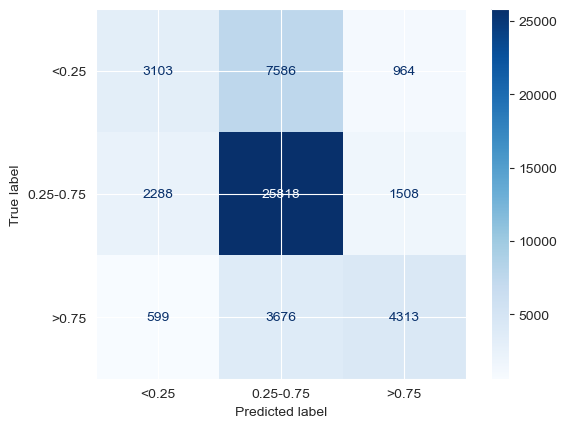

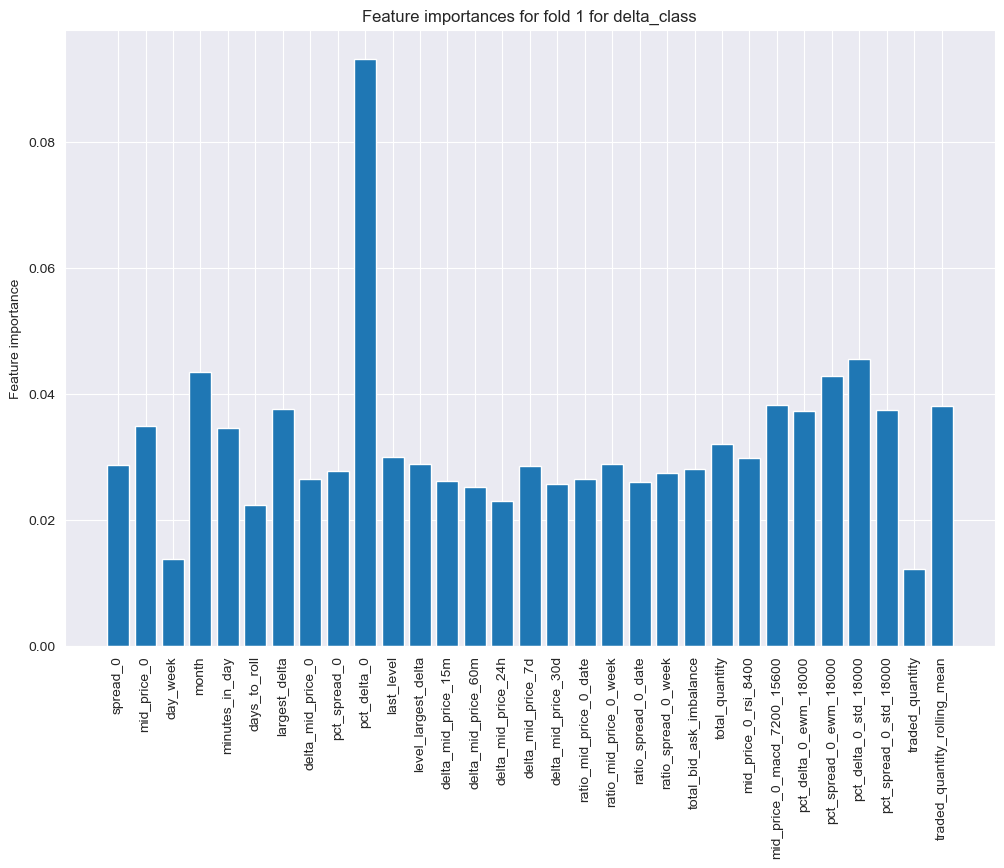

---------------------------------------------------
Accuracy: 0.634

Confusion matrix:
 [[ 1048  9699   675]
 [  315 25070  1195]
 [  228  6131  5493]]


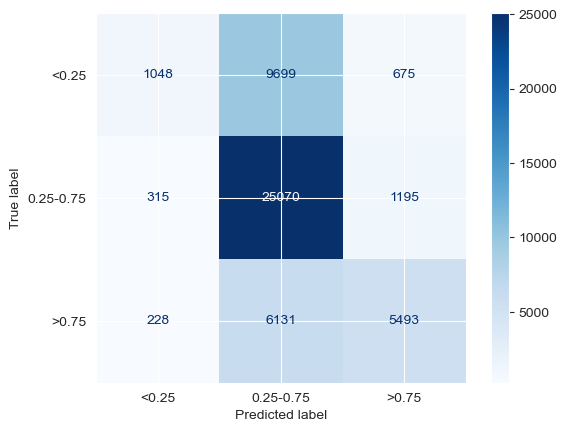

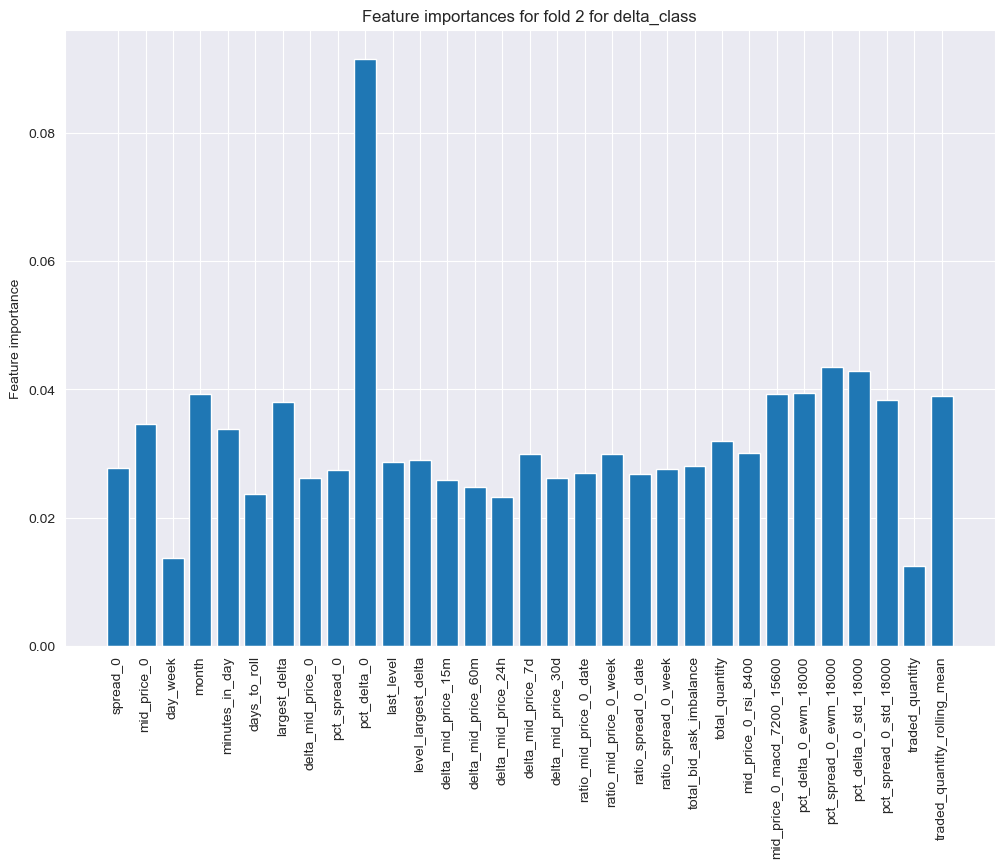

---------------------------------------------------
Accuracy: 0.580

Confusion matrix:
 [[ 2449 12709  1363]
 [ 1468 20599  1522]
 [  591  3276  5877]]


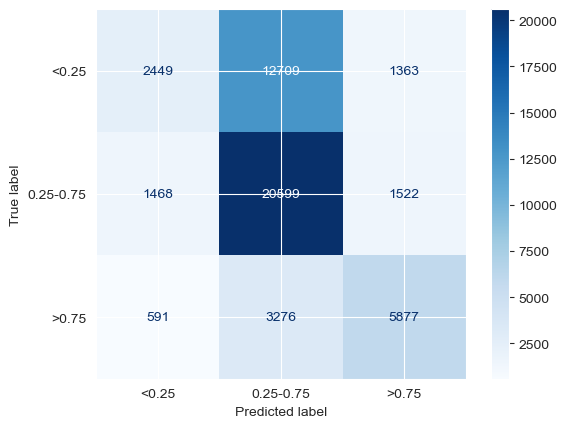

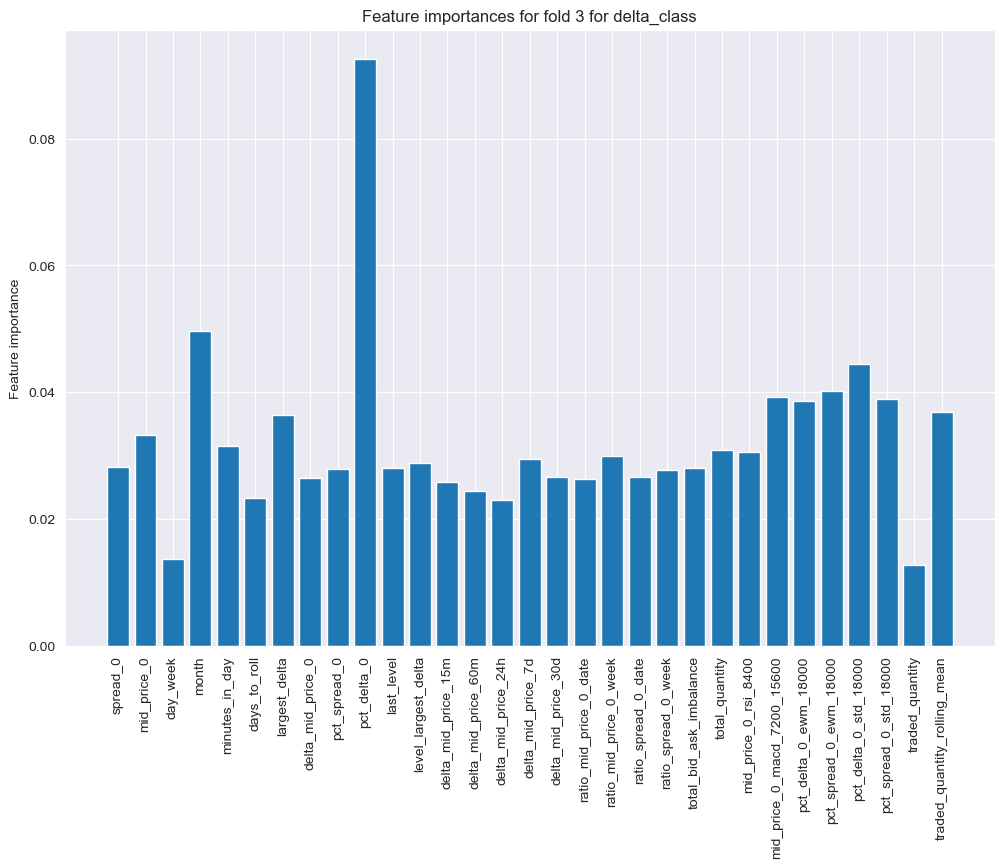

---------------------------------------------------
Accuracy: 0.677

Confusion matrix:
 [[ 1252  4825   348]
 [ 2184 29937  1295]
 [  648  6820  2545]]


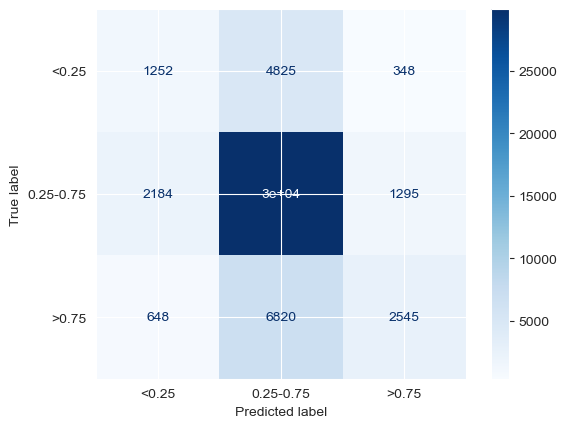

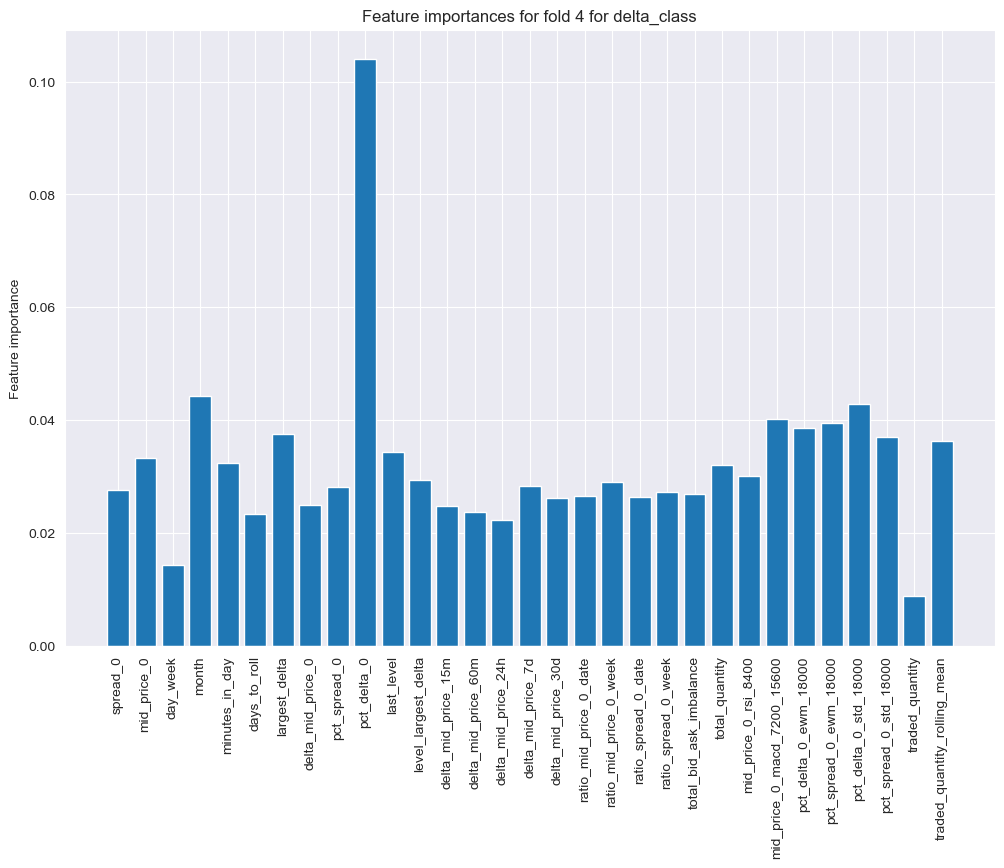

---------------------------------------------------
Accuracy: 0.423

Confusion matrix:
 [[ 2211 13076  1109]
 [  686 16570   500]
 [ 1347 12062  2293]]


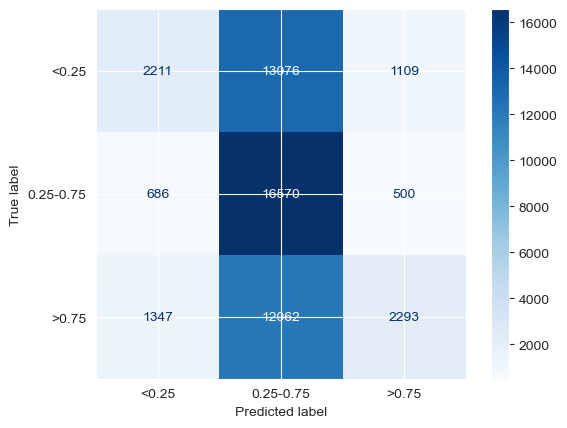

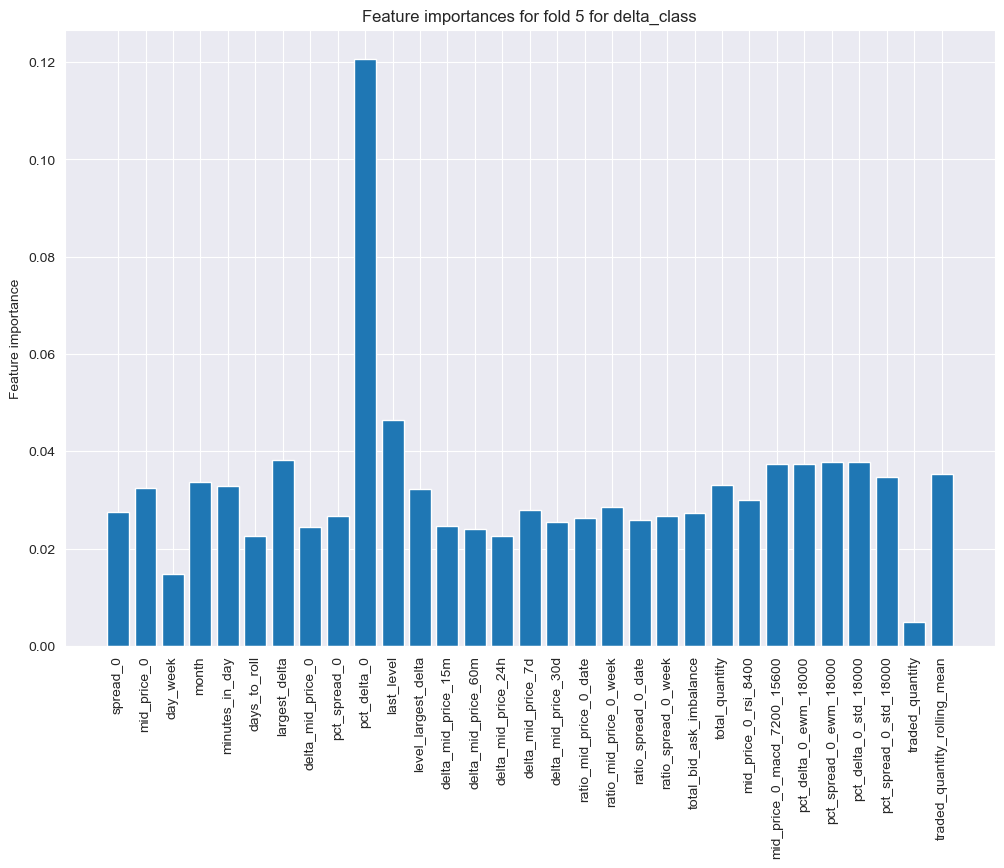

---------------------------------------------------
CV Accuracy delta(mekan ± std over 5 folds): 0.596 ± 0.093


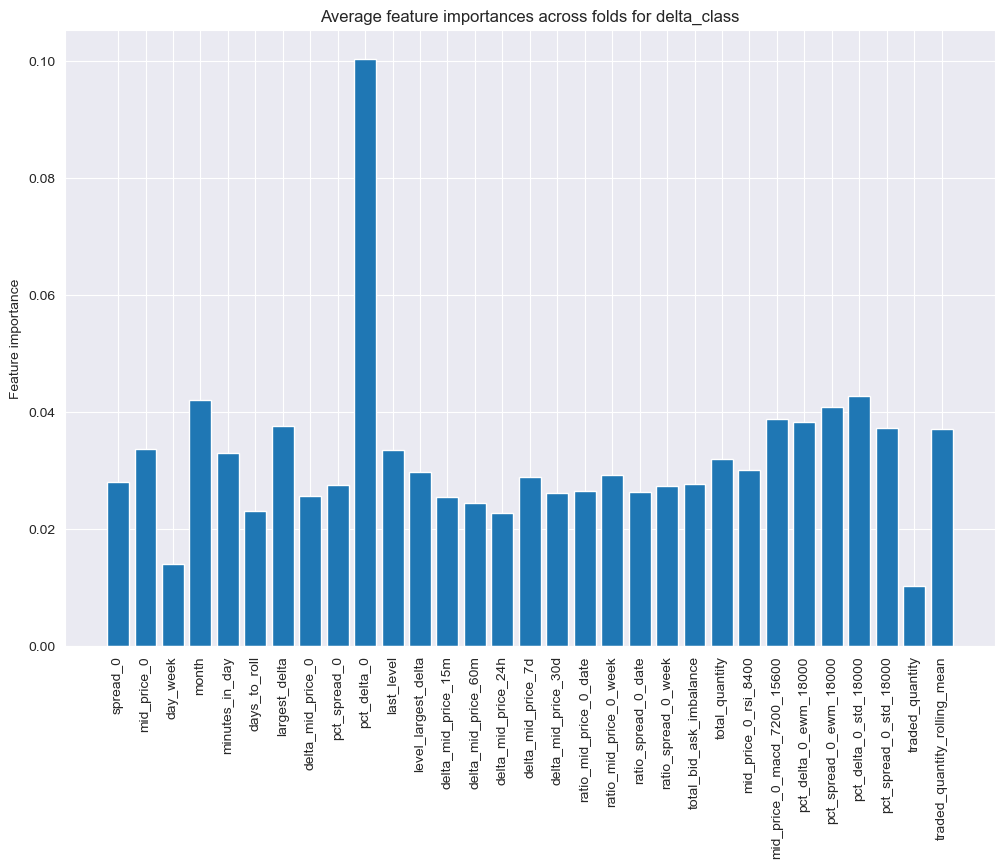

Evaluating spread_class
Accuracy: 0.787

Confusion matrix:
 [[ 4222  6986    16]
 [ 2291 27838   612]
 [   28   664  7198]]


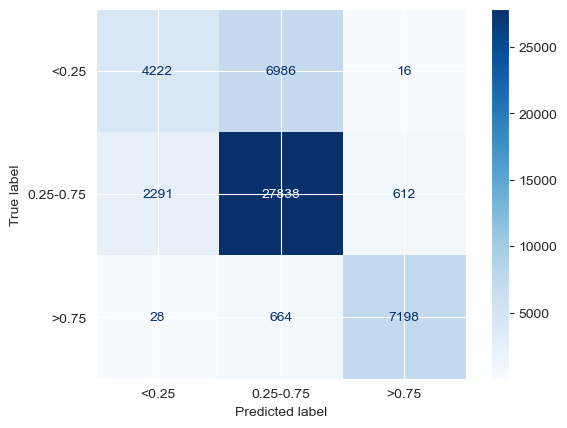

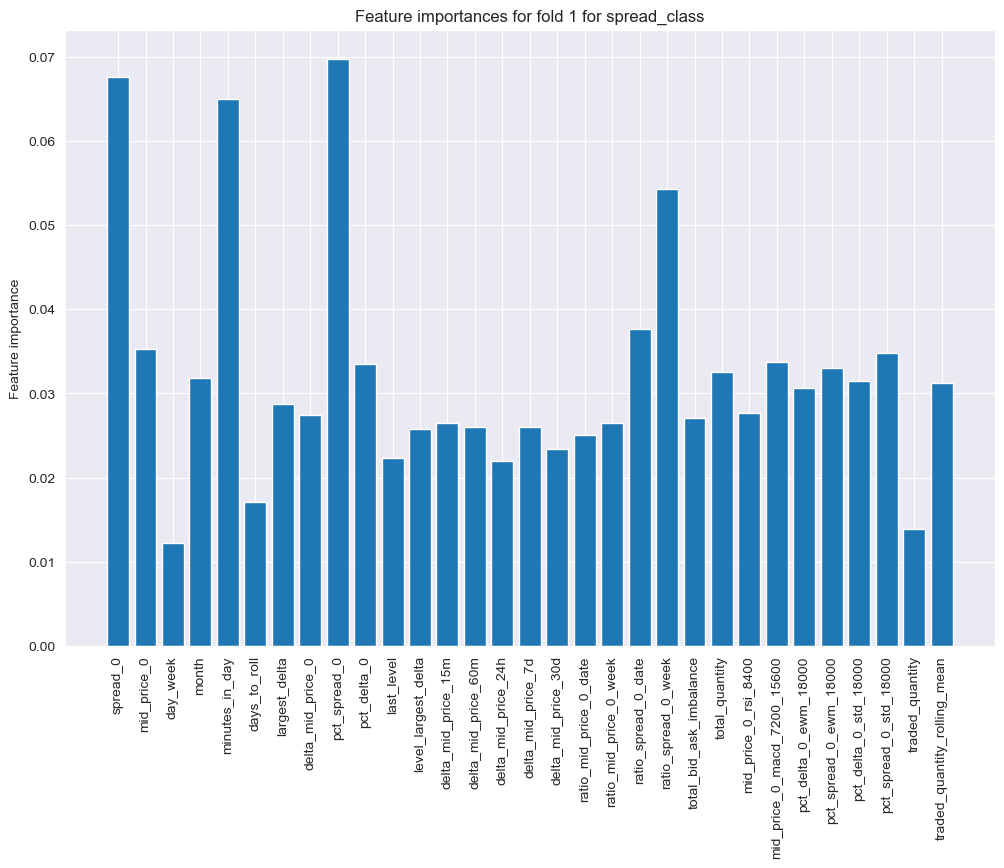

---------------------------------------------------
Accuracy: 0.803

Confusion matrix:
 [[ 3007  5141   116]
 [  555 30403  1530]
 [   45  2450  6607]]


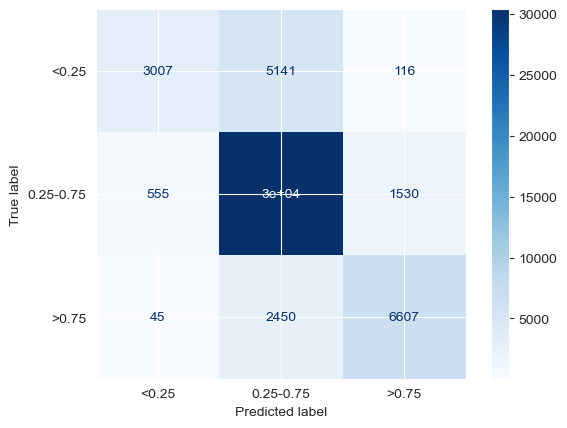

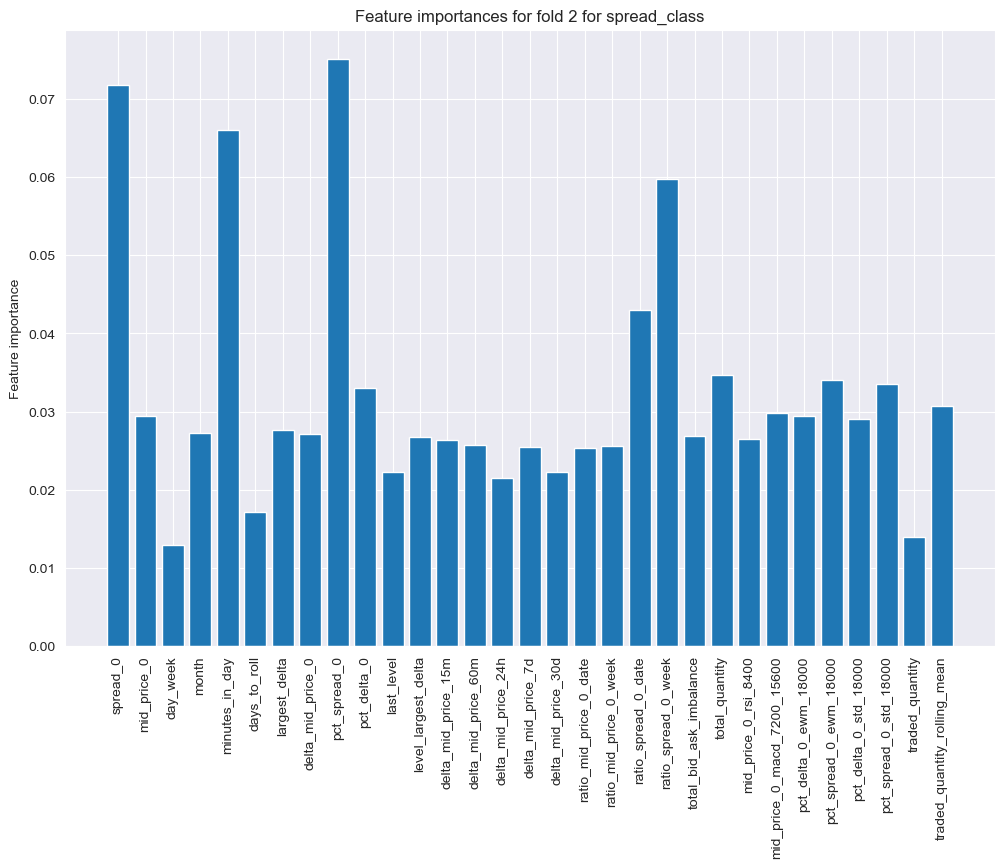

---------------------------------------------------
Accuracy: 0.616

Confusion matrix:
 [[ 4287 10464   229]
 [ 1976 18219  1731]
 [  400  4346  8202]]


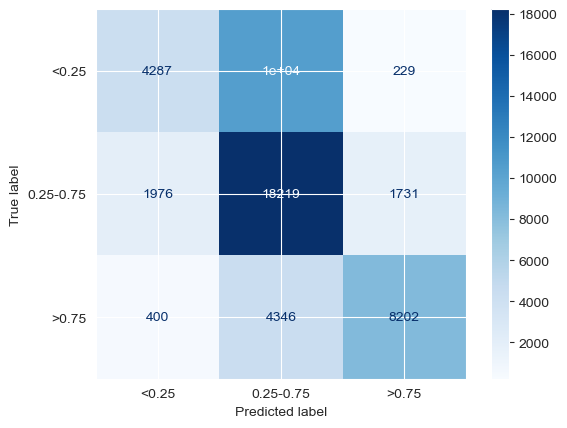

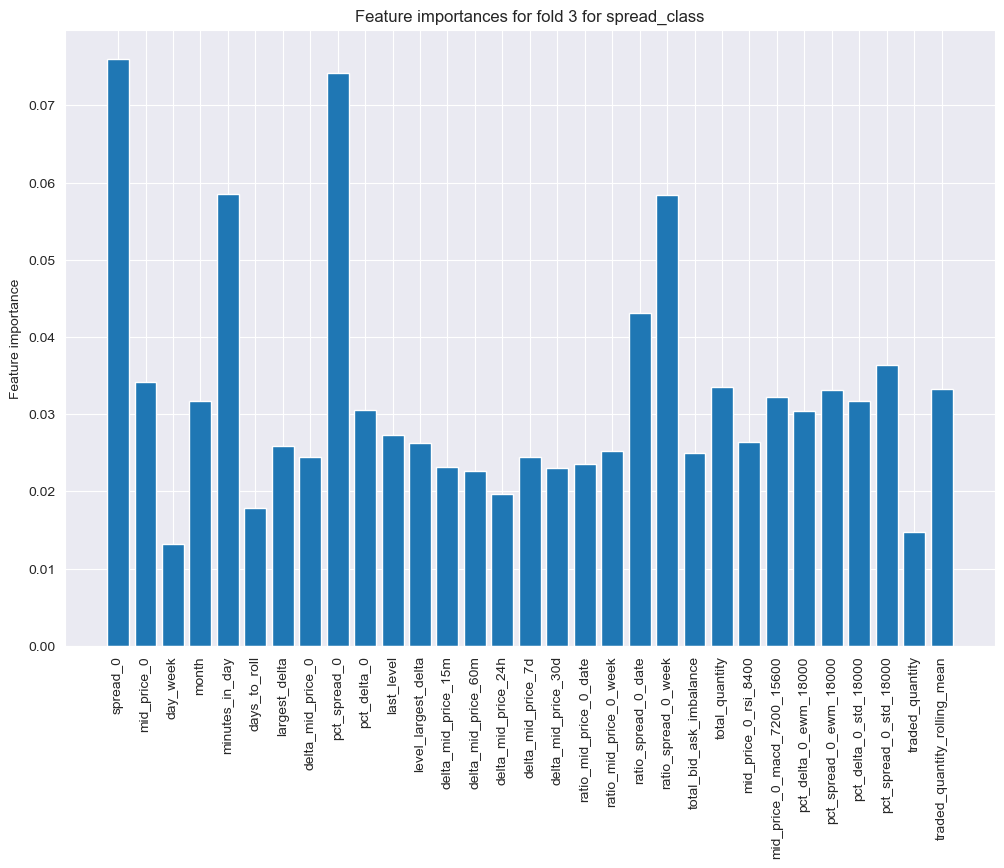

---------------------------------------------------
Accuracy: 0.530

Confusion matrix:
 [[ 5930 11832   519]
 [ 2327 14263  1569]
 [  766  6439  6209]]


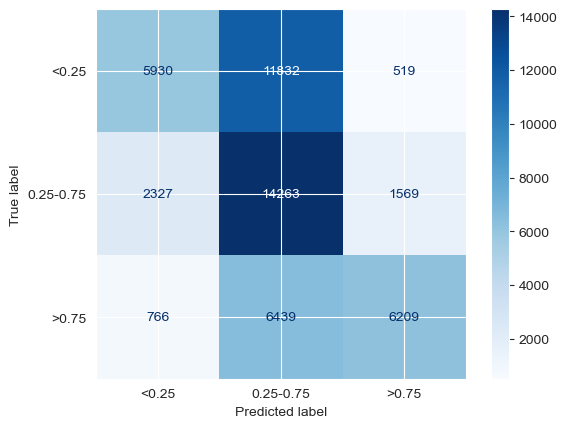

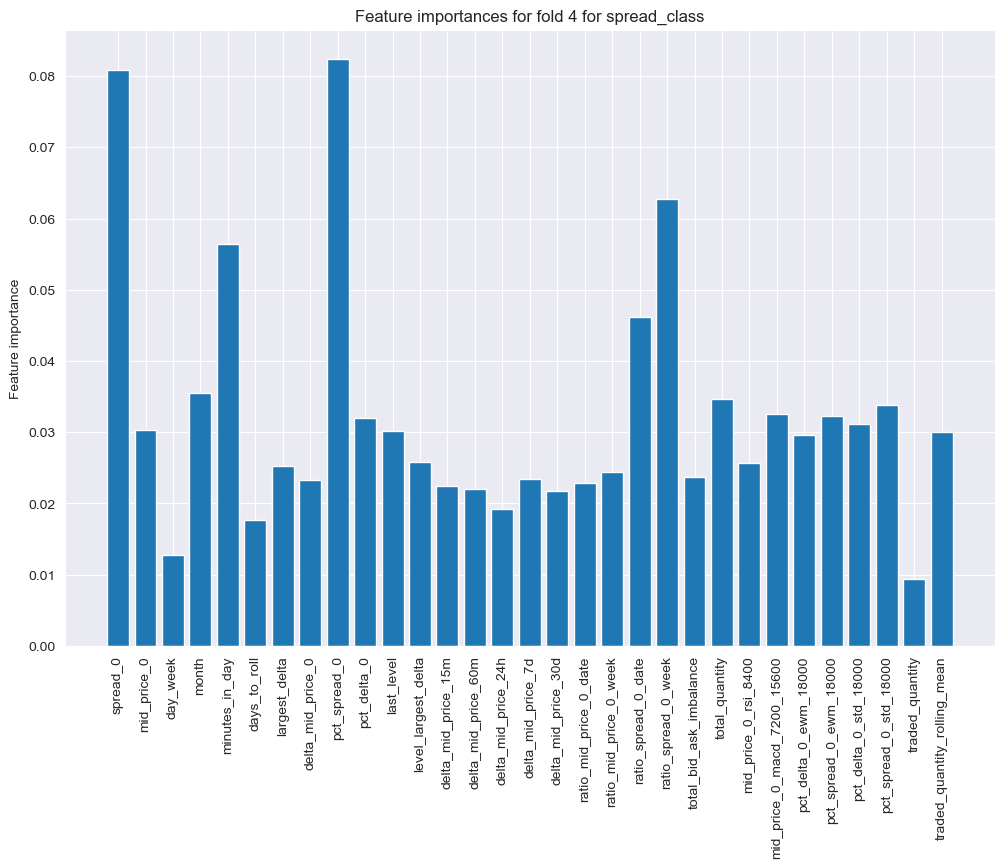

---------------------------------------------------
Accuracy: 0.555

Confusion matrix:
 [[ 3677  5516   421]
 [ 1739 18489  1167]
 [  987 12348  5510]]


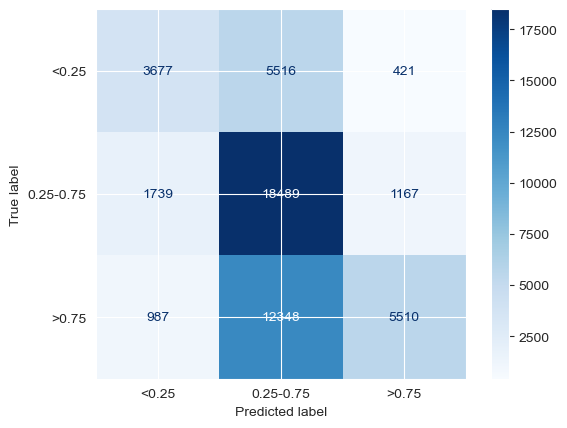

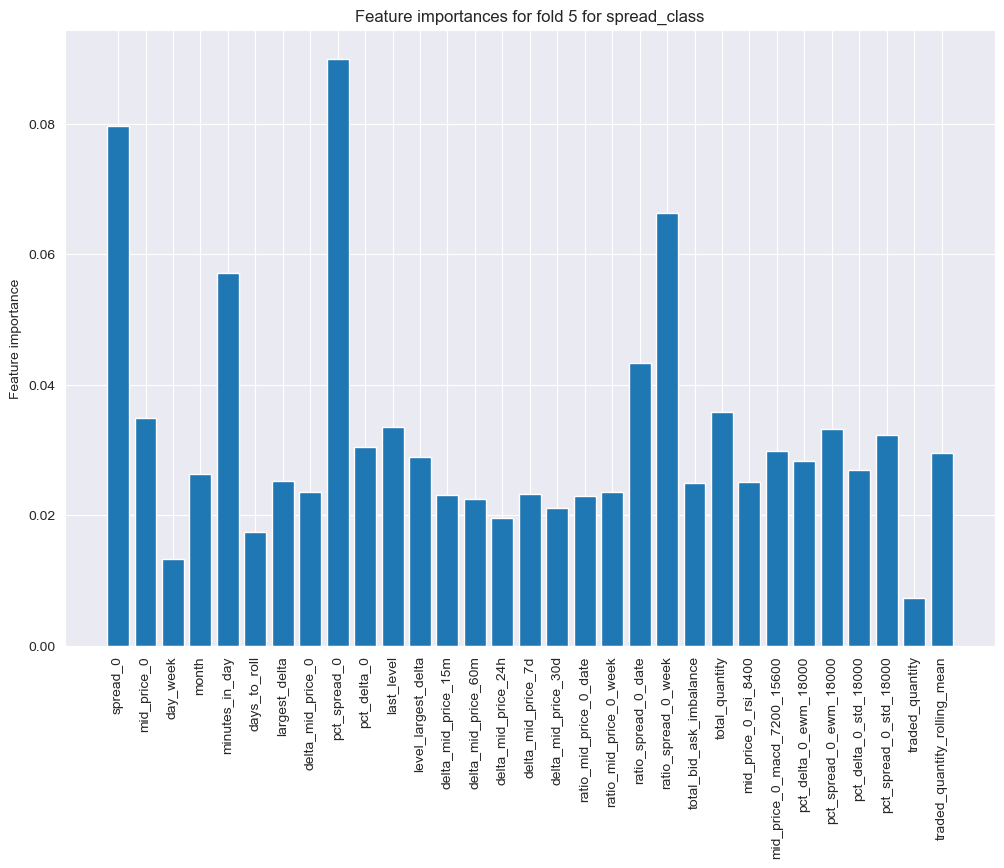

---------------------------------------------------
CV Accuracy delta(mekan ± std over 5 folds): 0.658 ± 0.115


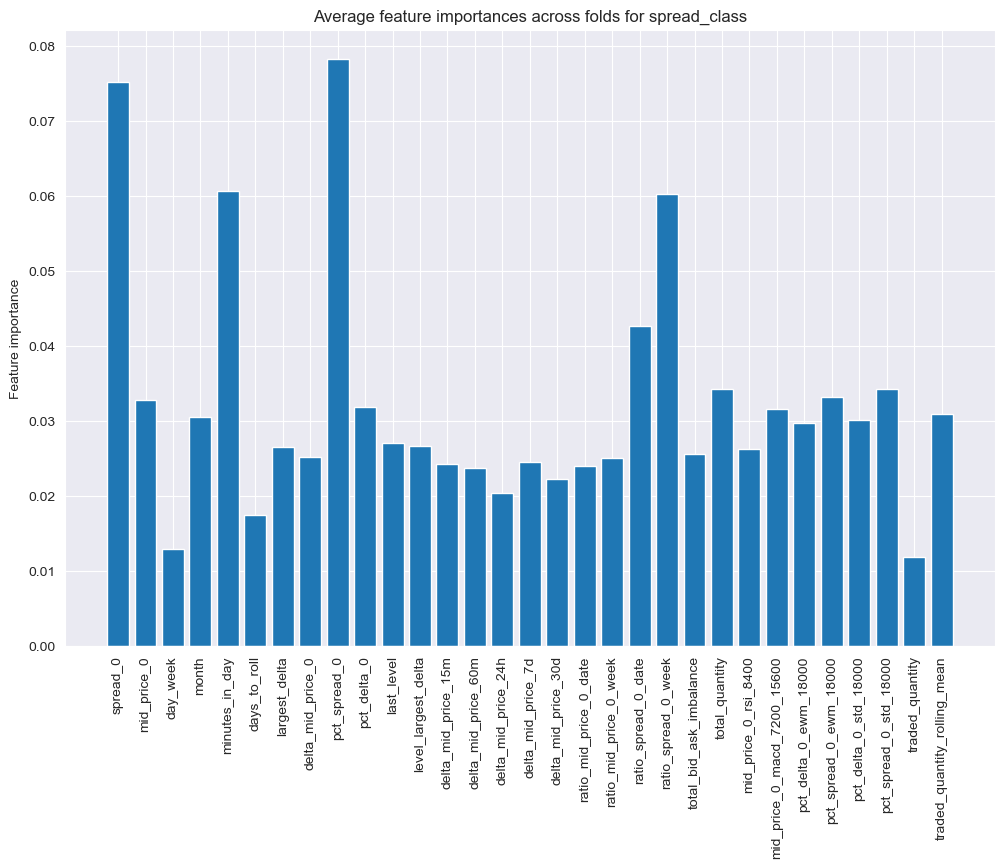

In [3]:
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

p25_delta, p75_delta, p25_spread, p75_spread = df2.select([
    pl.col("next_pct_delta").quantile(0.25).alias("d25"),
    pl.col("next_pct_delta").quantile(0.75).alias("d75"),
    pl.col("next_pct_spread").quantile(0.25).alias("s25"),
    pl.col("next_pct_spread").quantile(0.75).alias("s75")
]).row(0)

df2 = df2.with_columns([
    pl.when(pl.col("next_pct_delta") < p25_delta).then(0)
      .when(pl.col("next_pct_delta") <= p75_delta).then(1)
      .otherwise(2)
      .alias("delta_class"),

    pl.when(pl.col("next_pct_spread") < p25_spread).then(0)
      .when(pl.col("next_pct_spread") <= p75_spread).then(1)
      .otherwise(2)
      .alias("spread_class")
])

X = df2.select(x_columns).to_numpy()
X = X[::3]

for target in ['delta_class', 'spread_class']:
    print(f'Evaluating {target}')

    y = df2.select(target).to_numpy().flatten()[::3]

    kf = KFold(n_splits=5, shuffle=False)

    fold_accuracies = []
    fold_importances = []

    fold_idx = 1
    for train_idx, test_idx in kf.split(X):

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf2 = ExtraTreesClassifier(n_estimators=100, random_state=42)
        clf2.fit(X_train, y_train)

        y_pred = clf2.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.3f}\n")
        fold_accuracies.append(accuracy)


        cm = confusion_matrix(y_test, y_pred)
        print("Confusion matrix:\n", cm)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['<0.25', '0.25-0.75', '>0.75'])
        disp.plot(cmap = 'Blues')
        plt.show()
        

        importances = clf2.feature_importances_
        fold_importances.append(importances)

        plt.figure(figsize=(12, 8))
        plt.bar(x_columns, importances)
        plt.xticks(rotation=90)
        plt.ylabel("Feature importance")
        plt.title(f"Feature importances for fold {fold_idx} for {target}")
        plt.show()

        print("---------------------------------------------------")
        fold_idx += 1


    mean_acc = np.mean(fold_accuracies)
    std_acc  = np.std(fold_accuracies)
    print(f"CV Accuracy delta(mekan ± std over {kf.n_splits} folds): {mean_acc:.3f} ± {std_acc:.3f}")

    fold_importances = np.array(fold_importances)
    avg_importances = fold_importances.mean(axis=0)

    plt.figure(figsize=(12, 8))
    plt.bar(x_columns, avg_importances)
    plt.xticks(rotation=90)
    plt.ylabel("Feature importance")
    plt.title(f"Average feature importances across folds for {target}")
    plt.show()
    

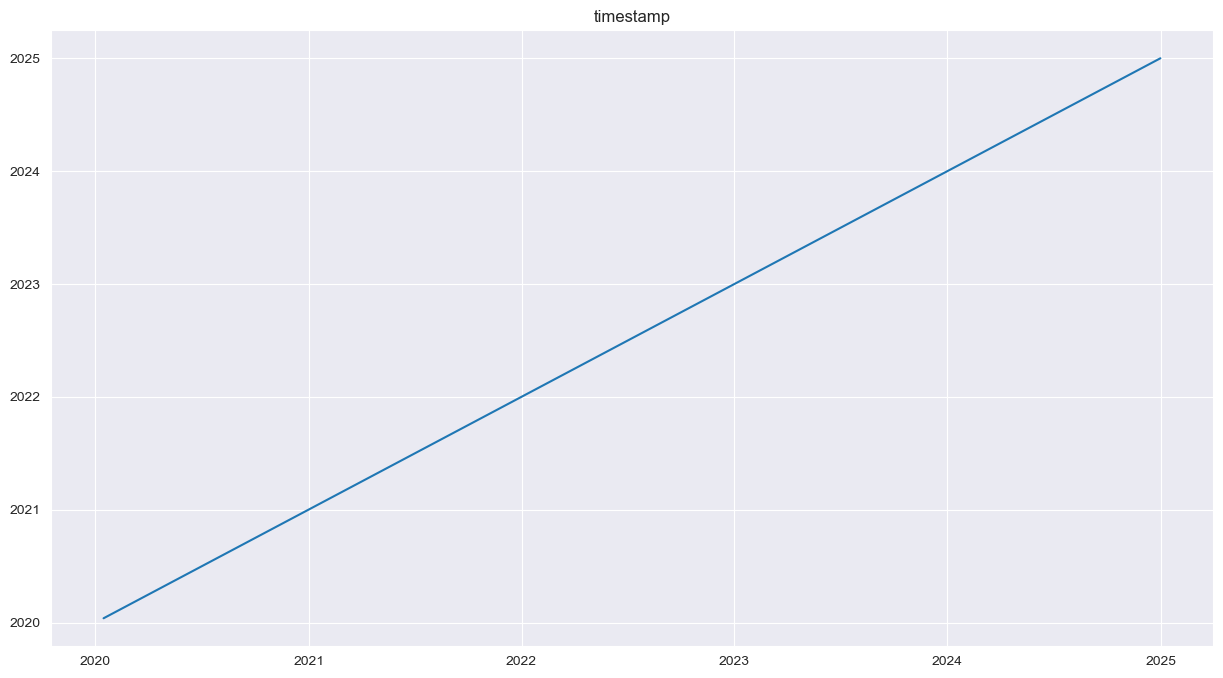

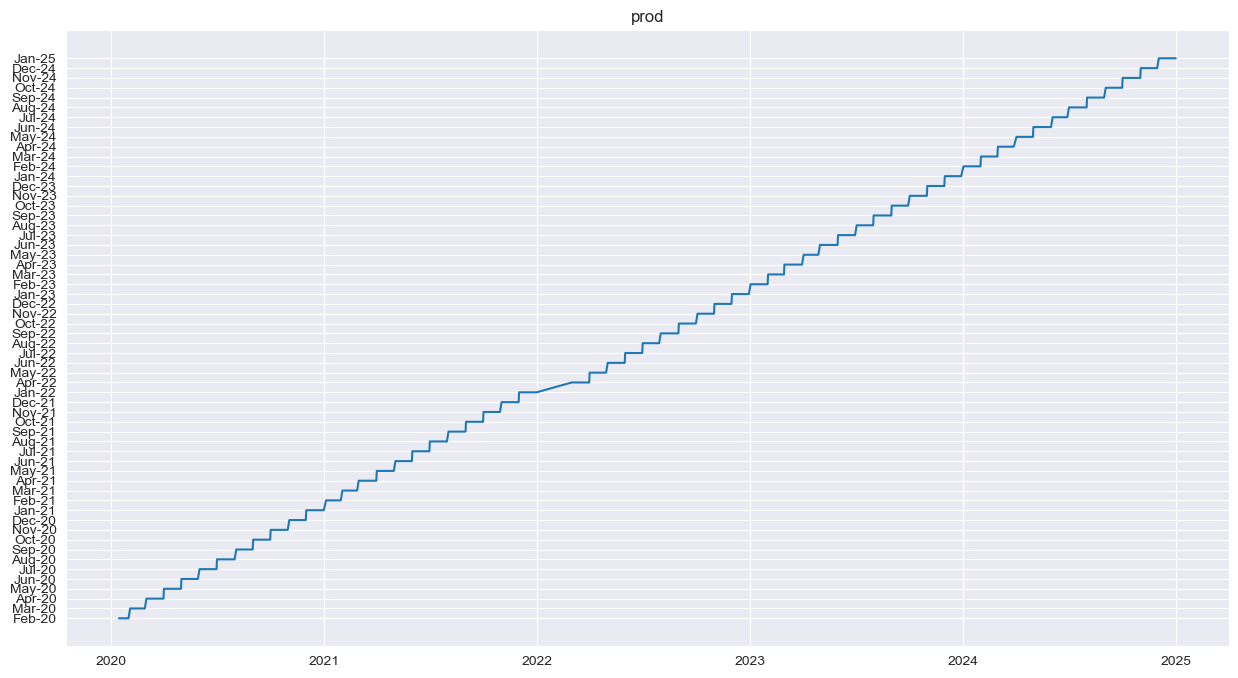

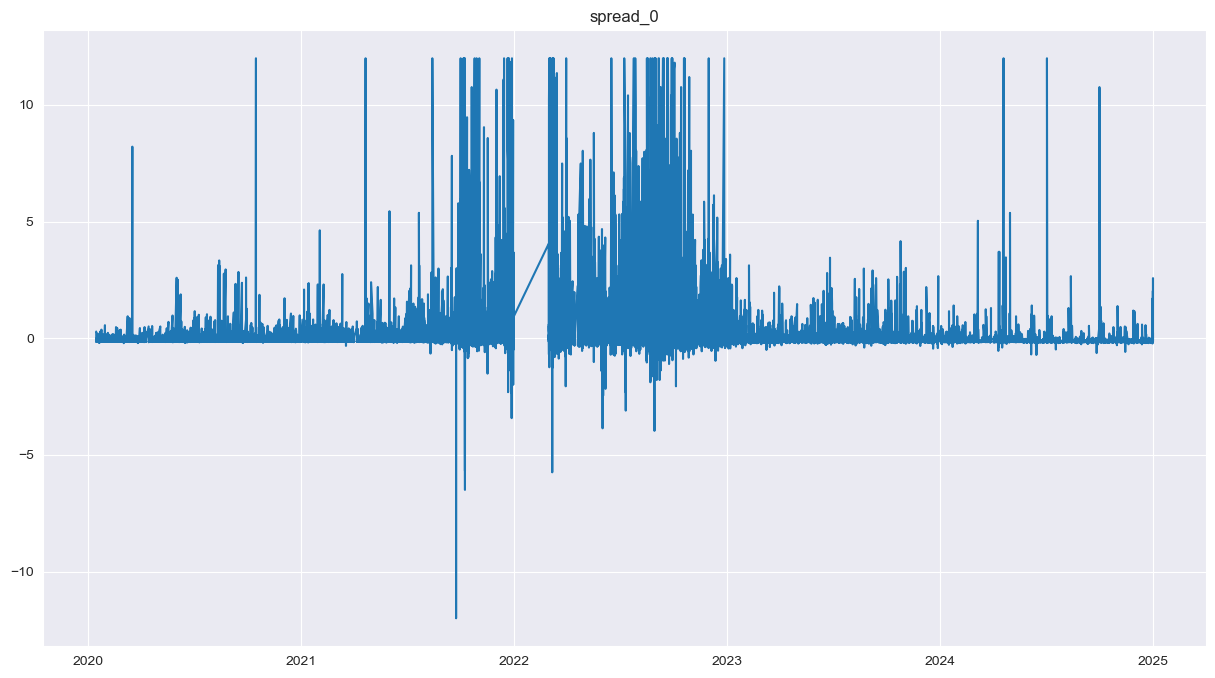

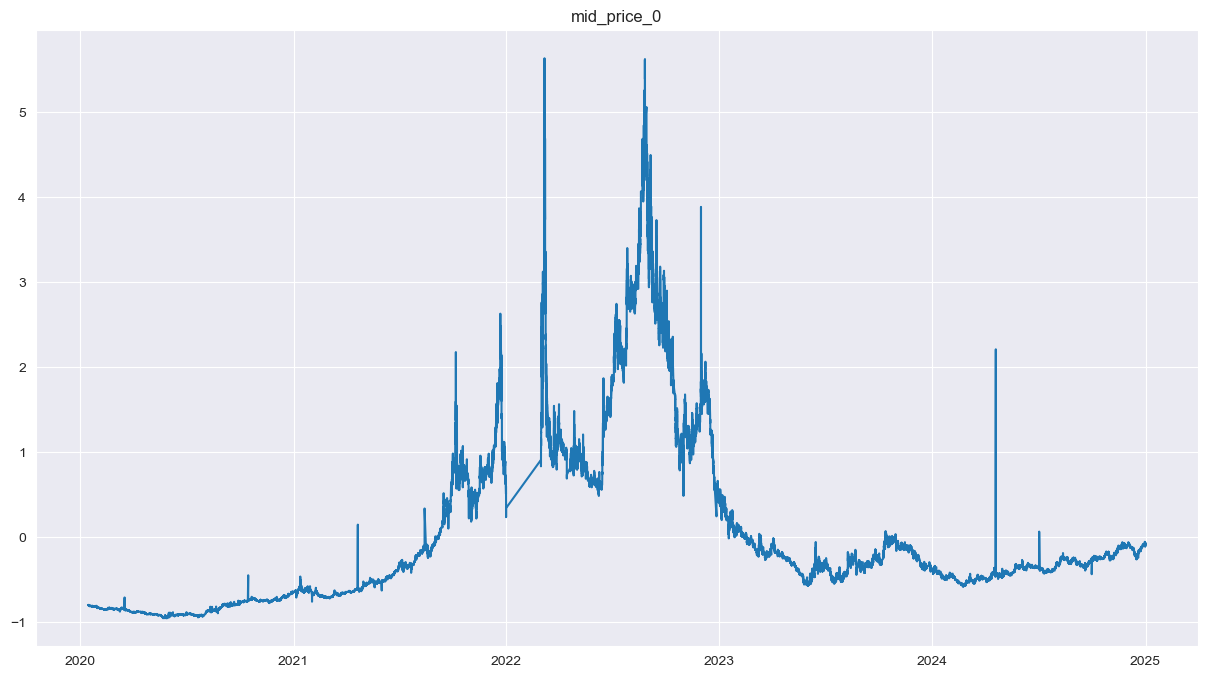

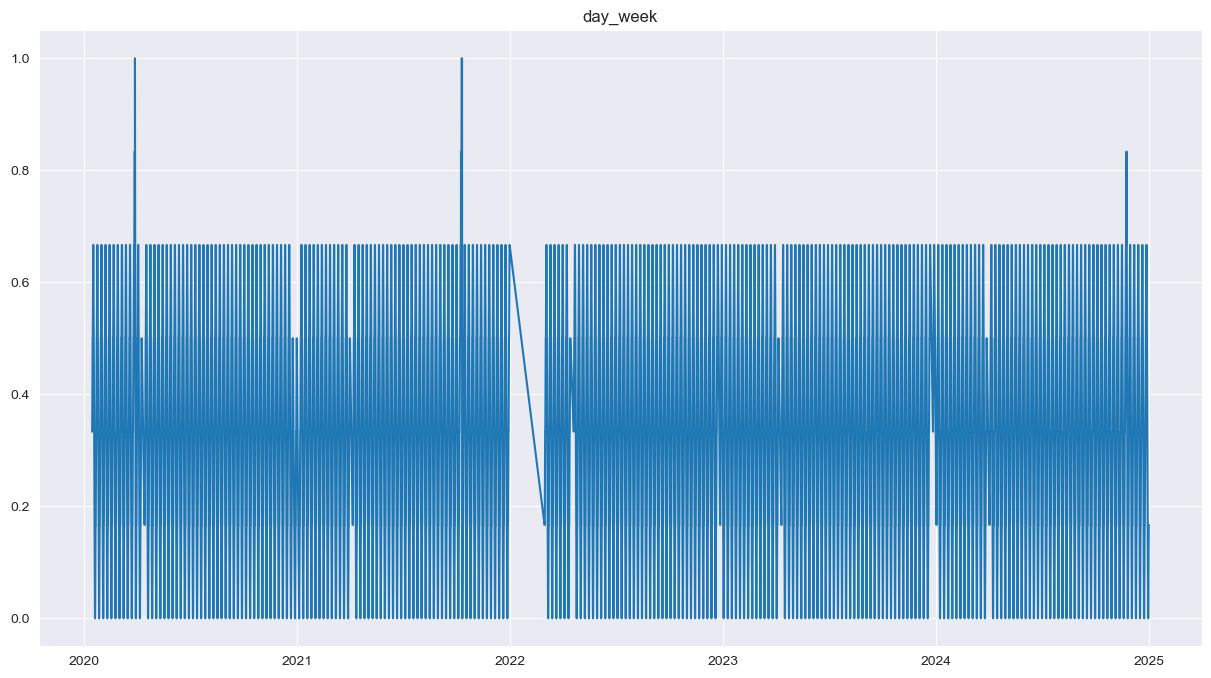

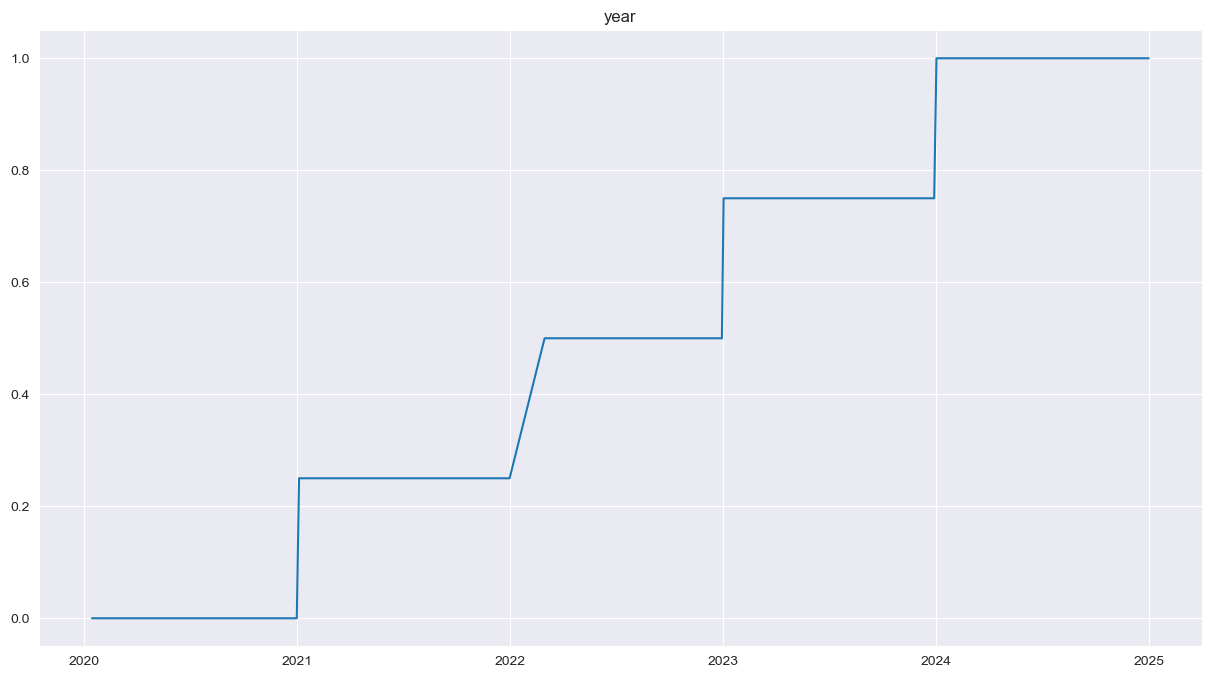

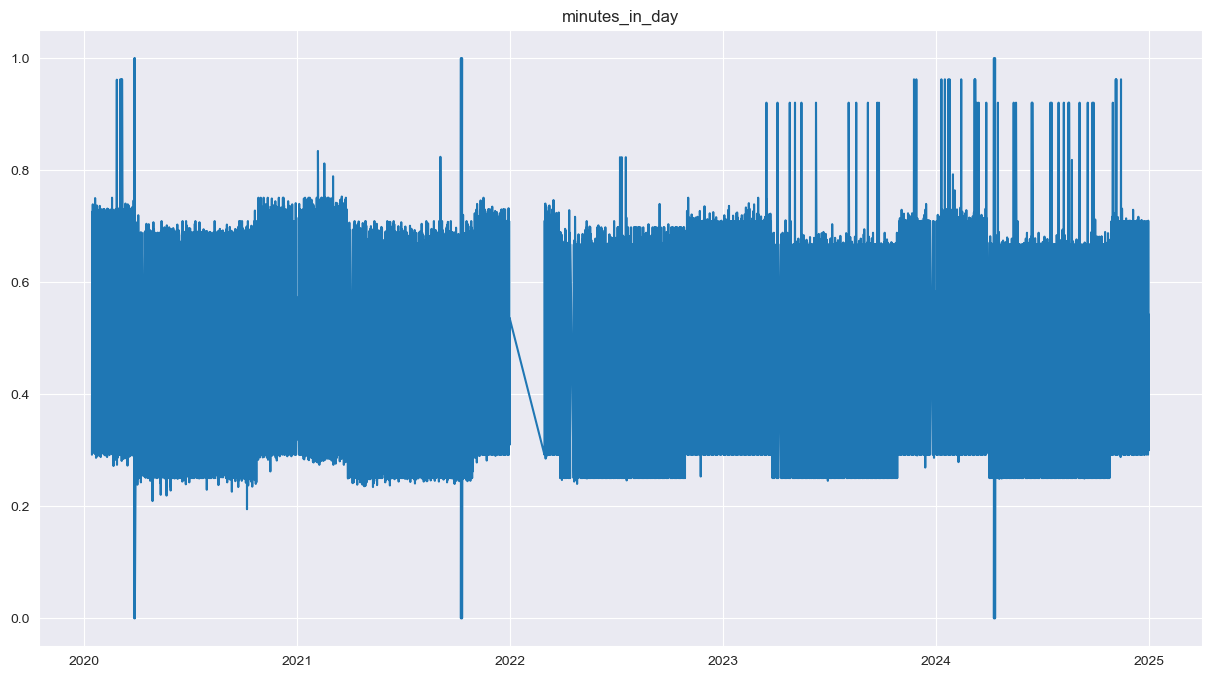

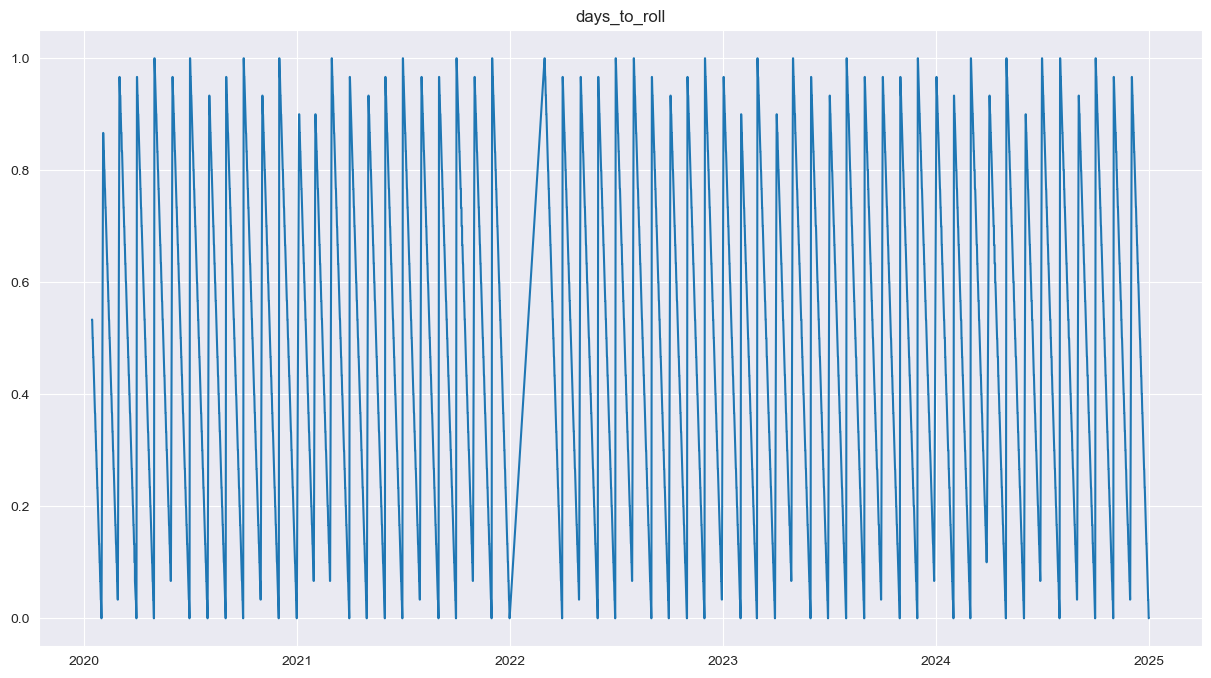

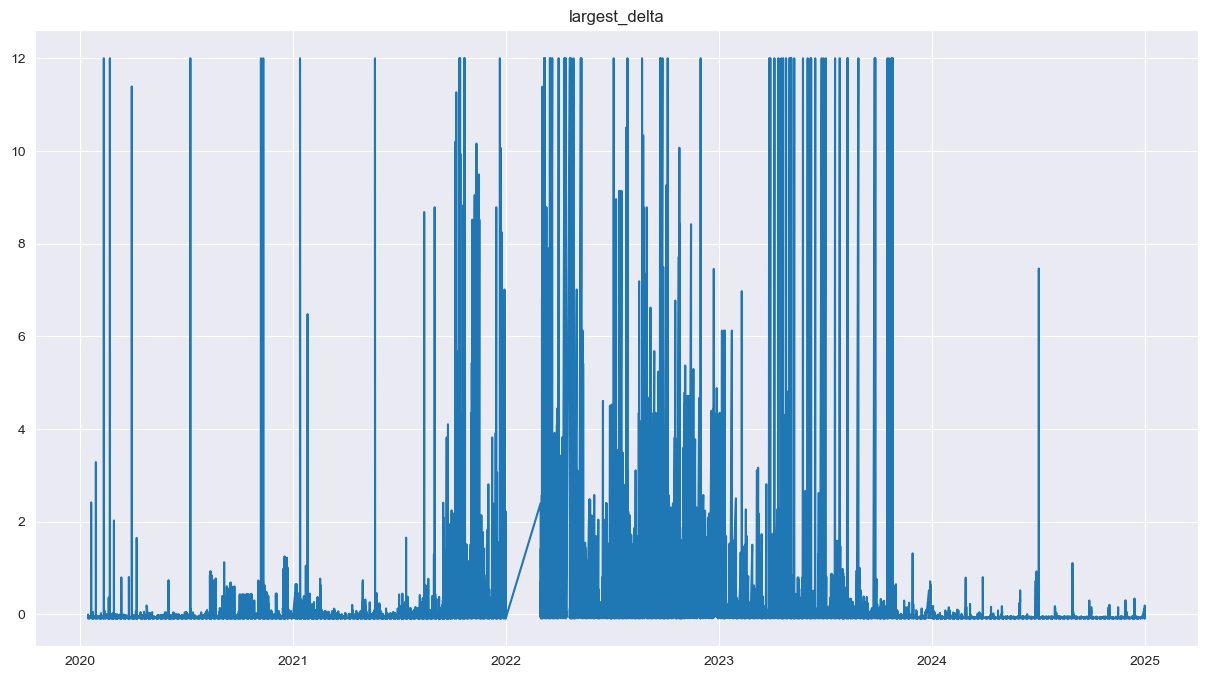

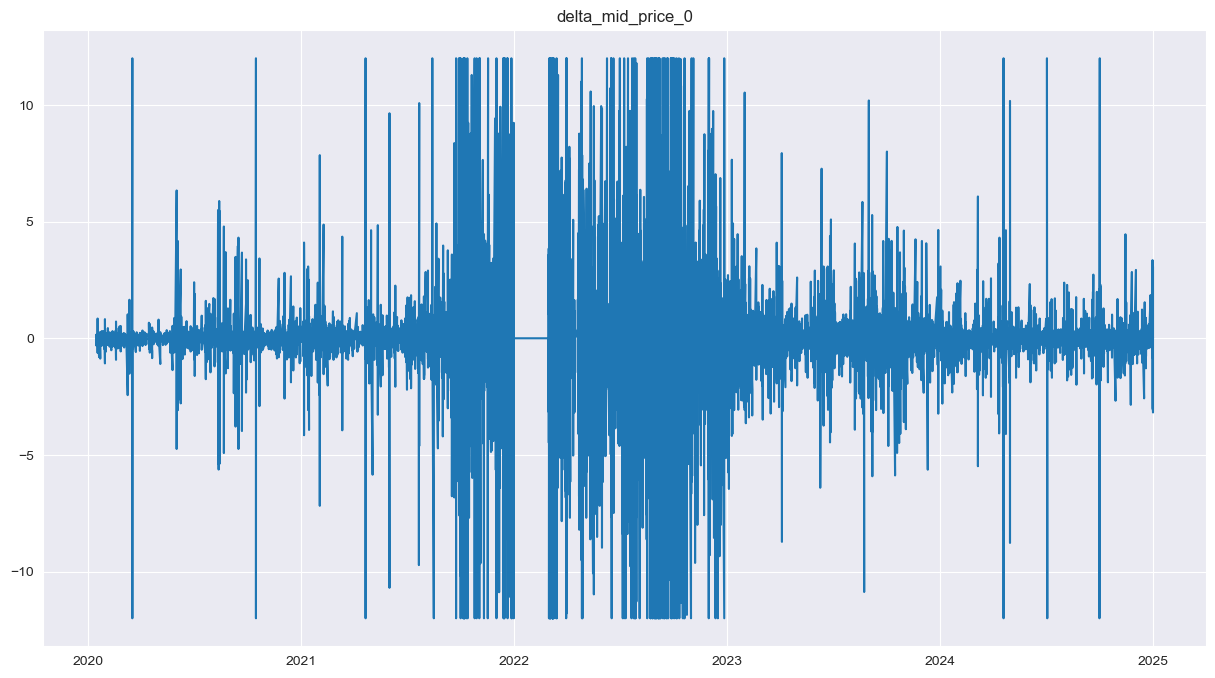

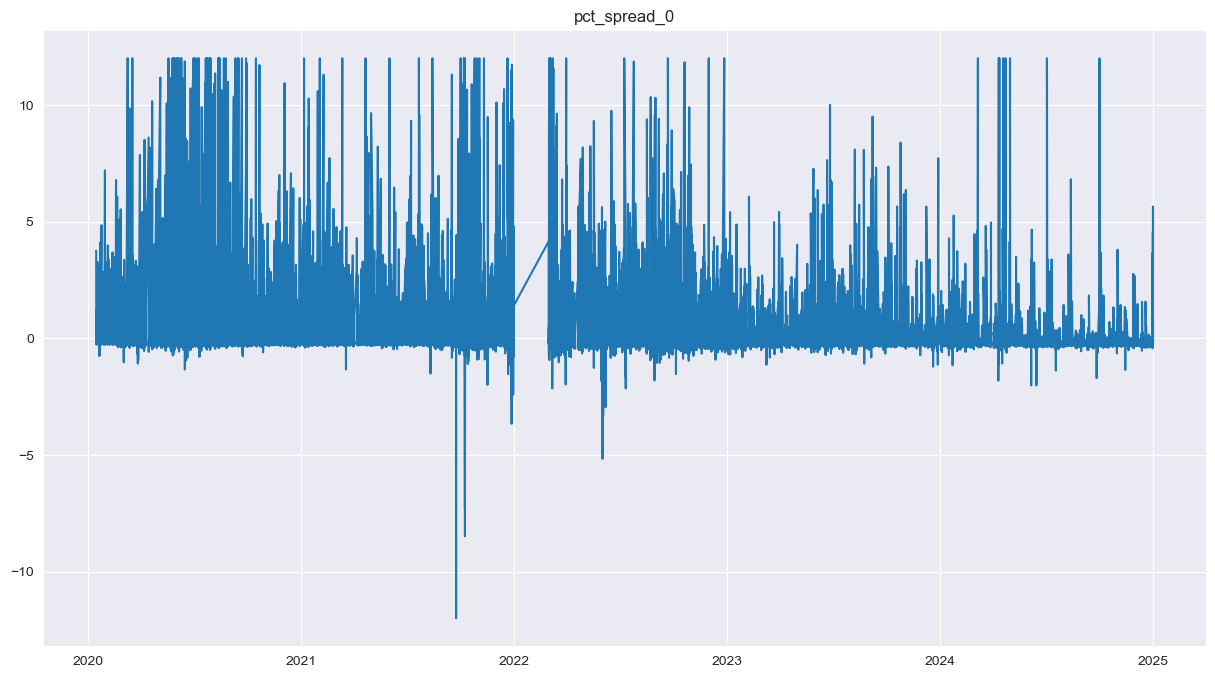

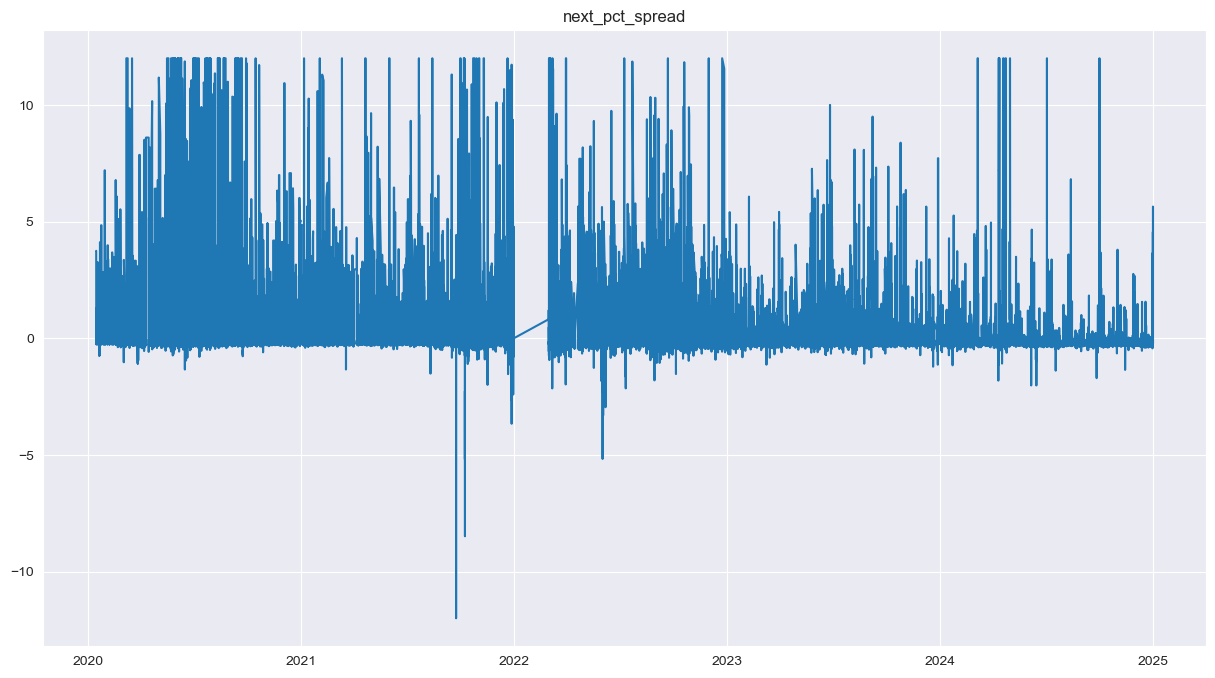

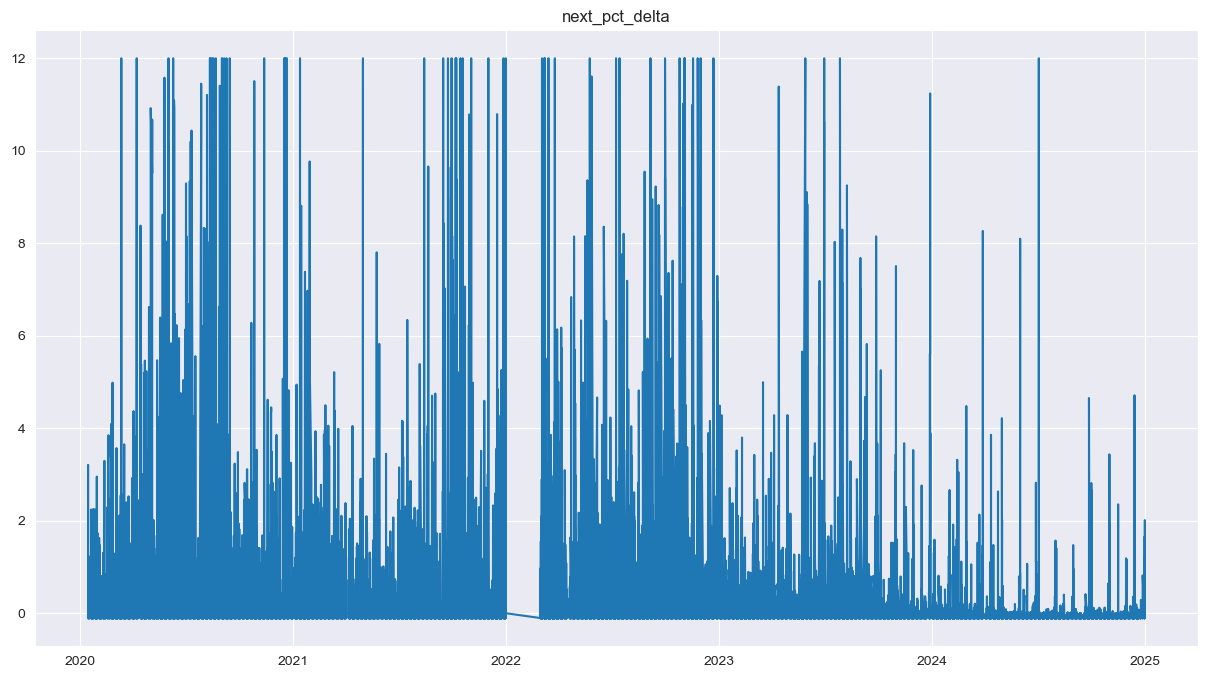

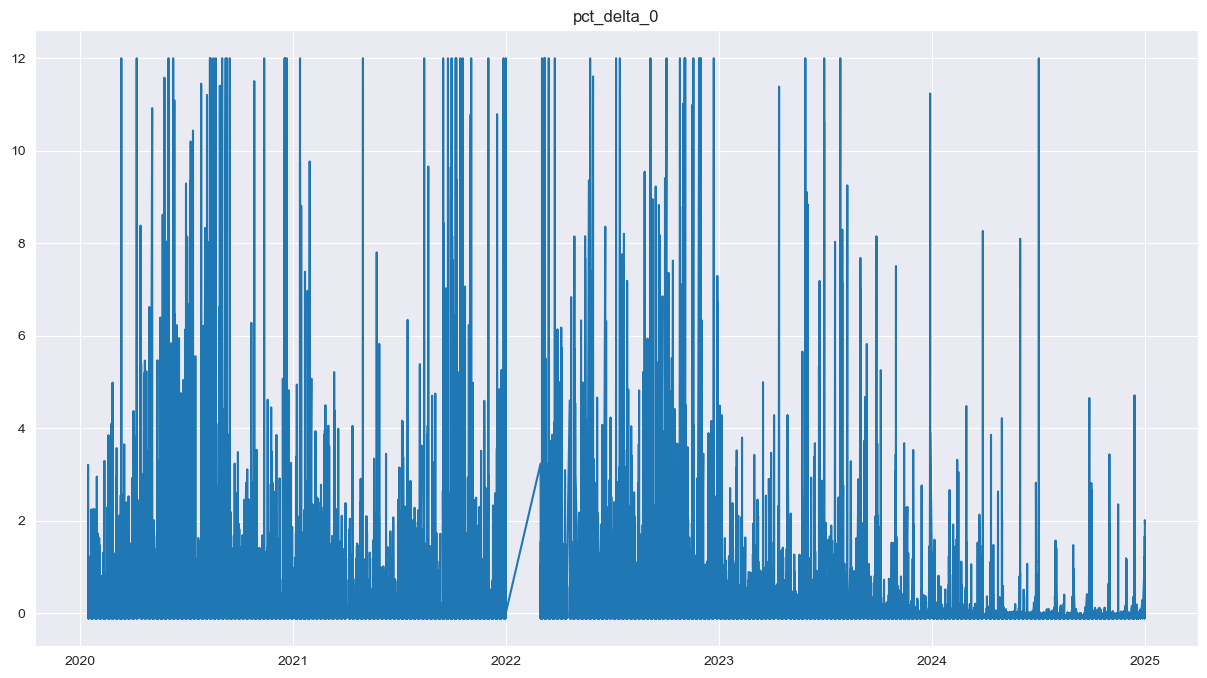

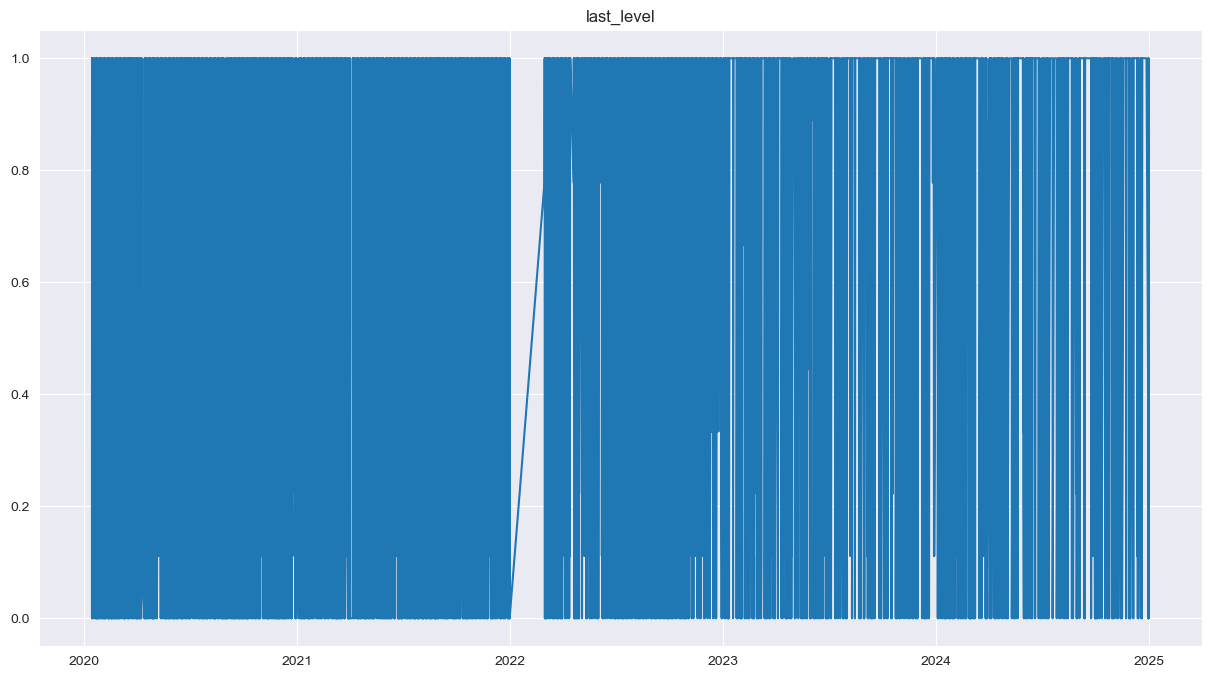

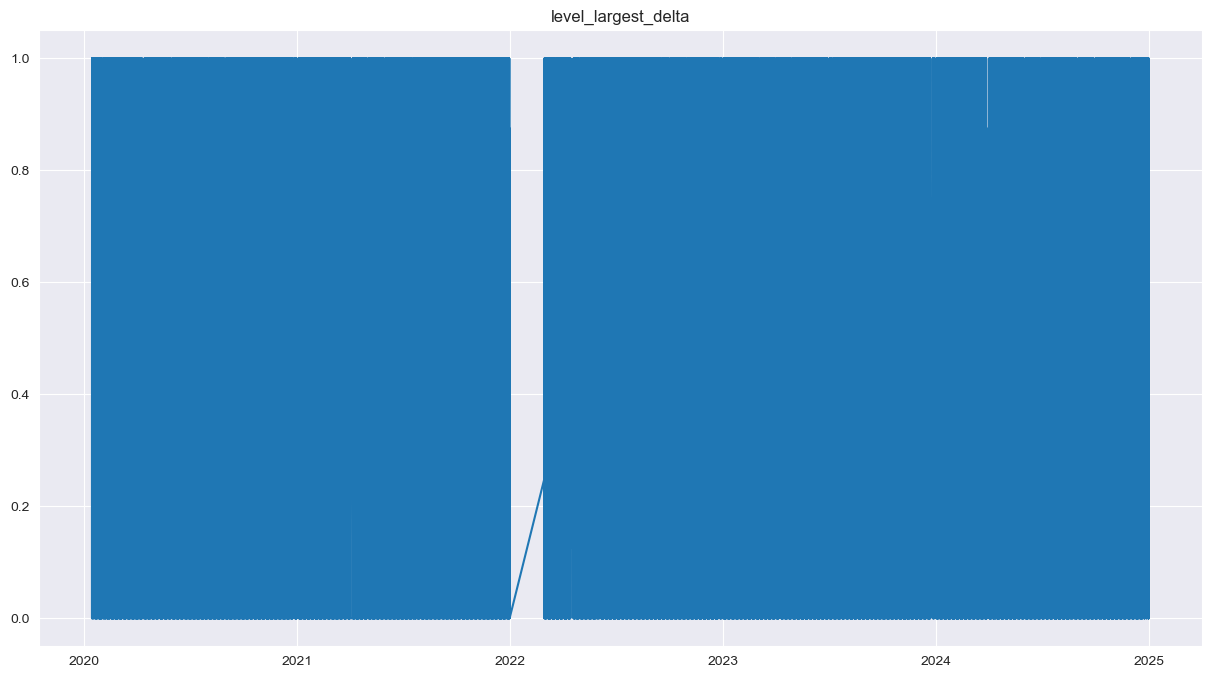

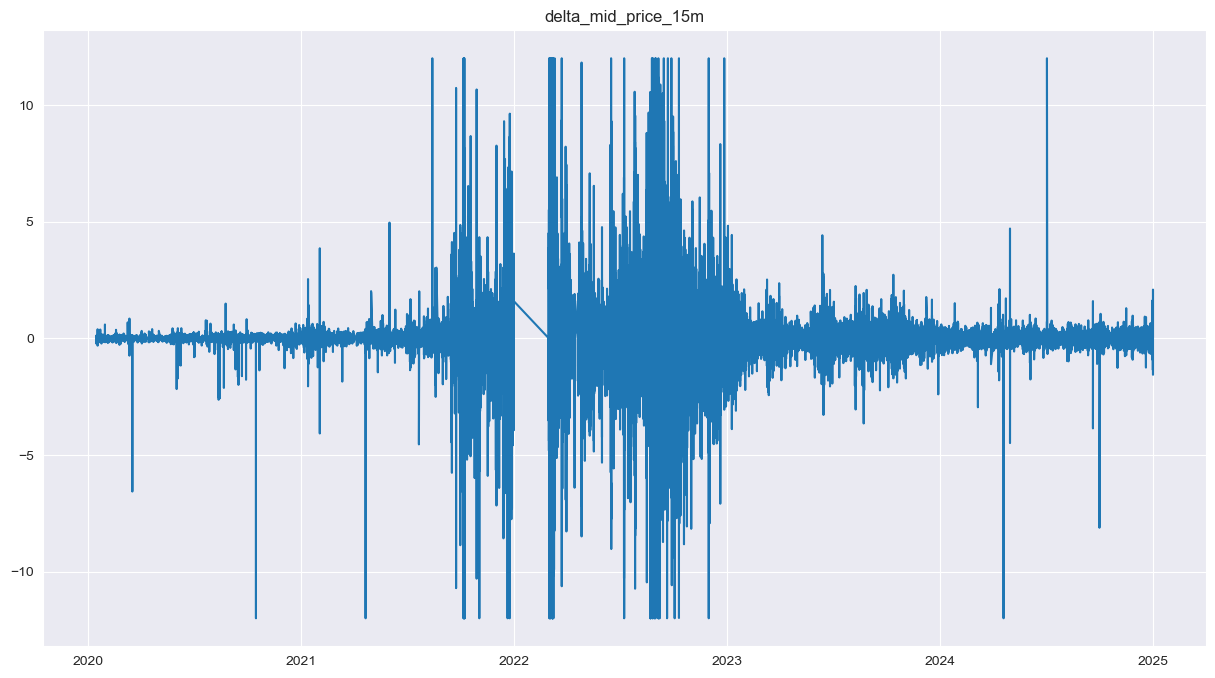

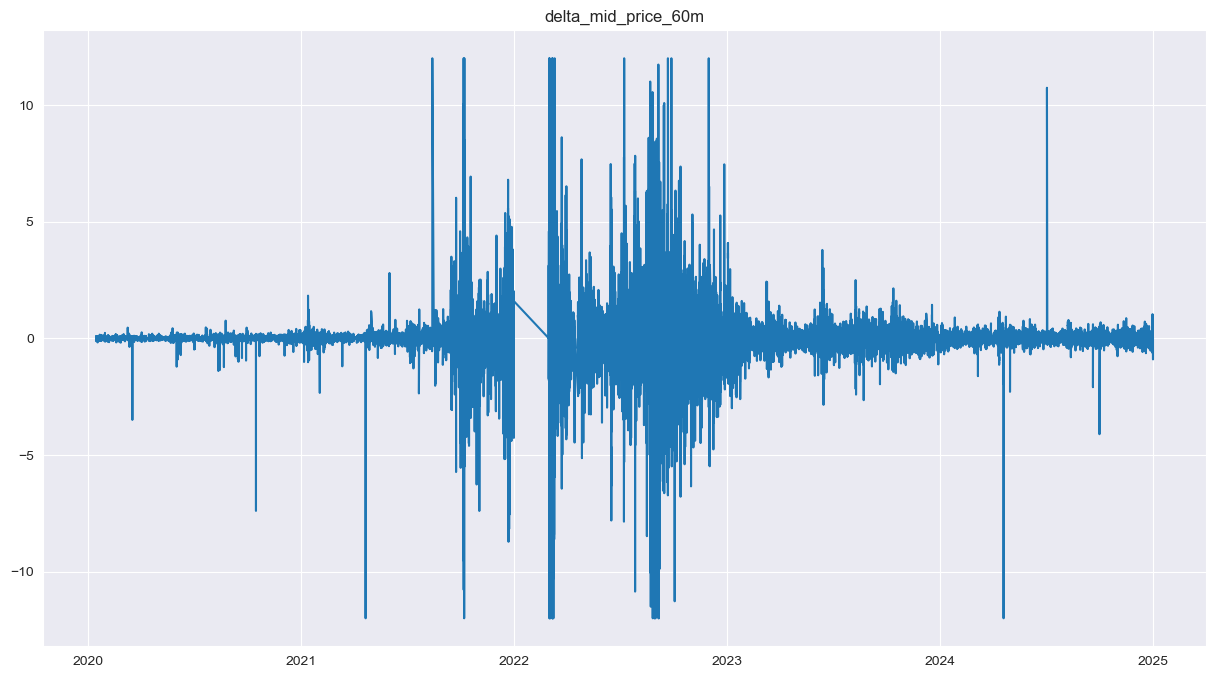

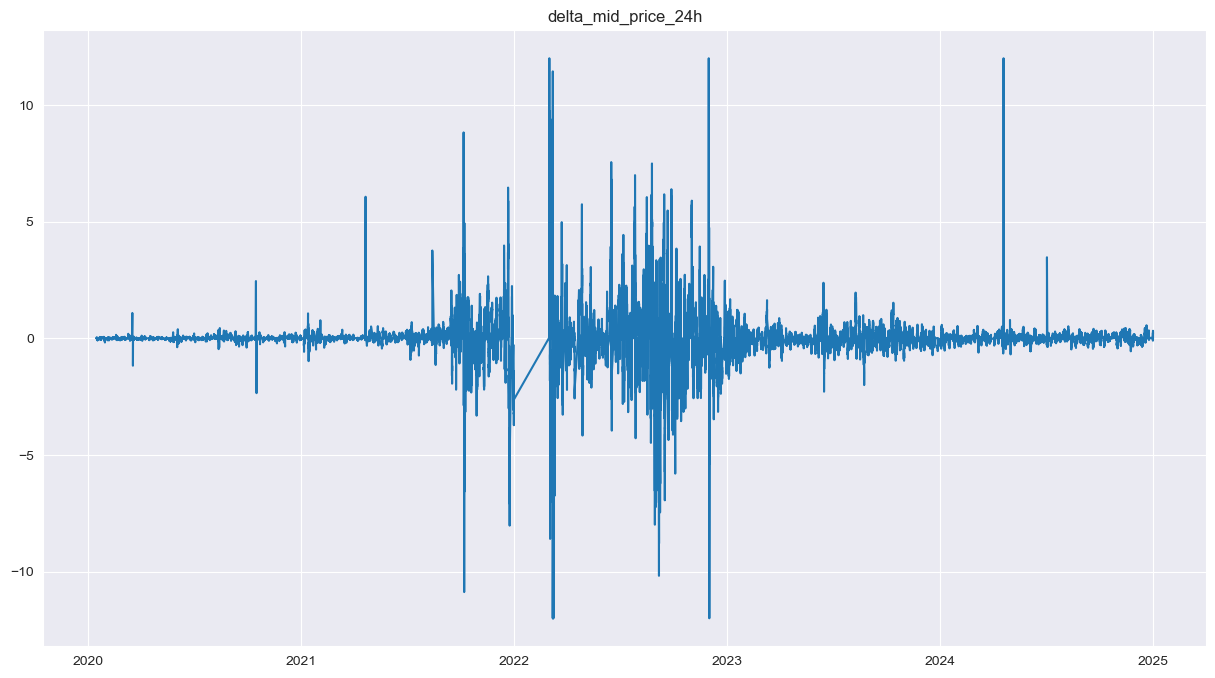

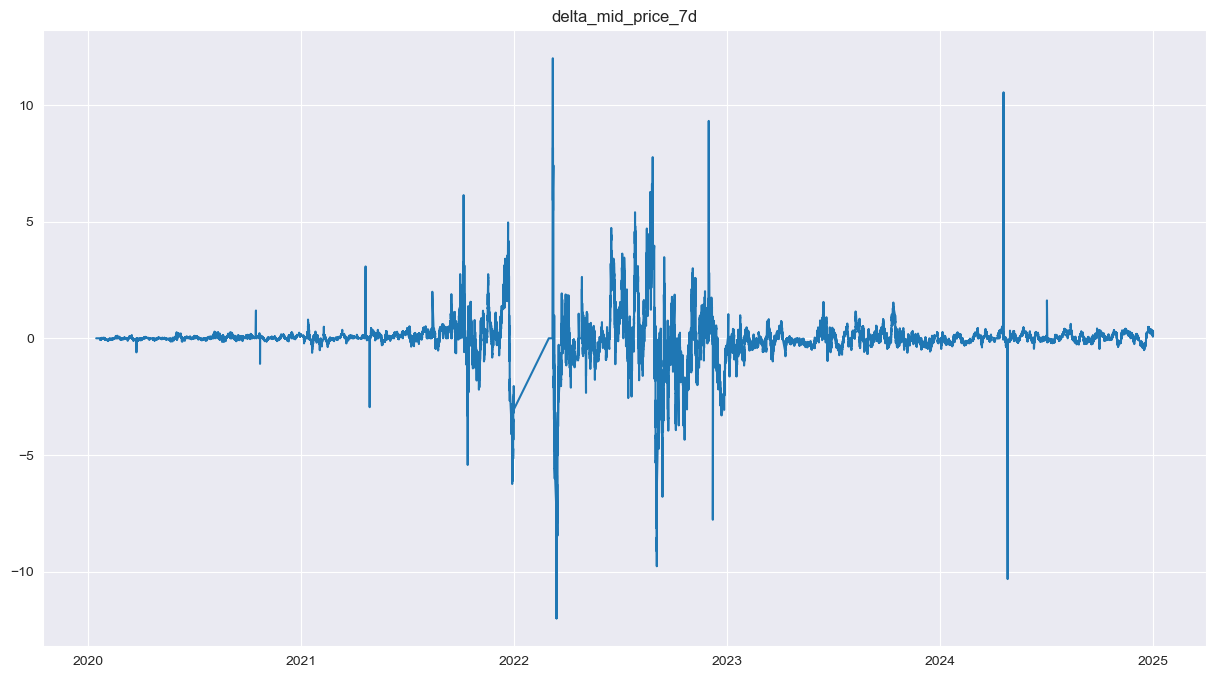

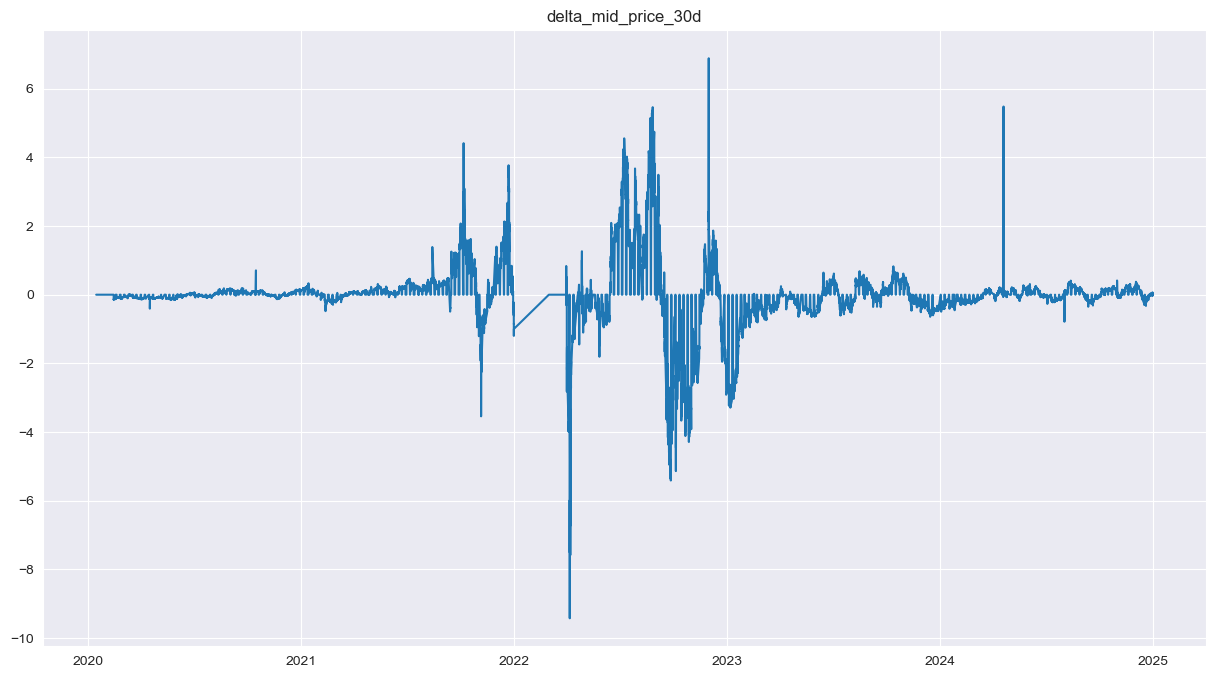

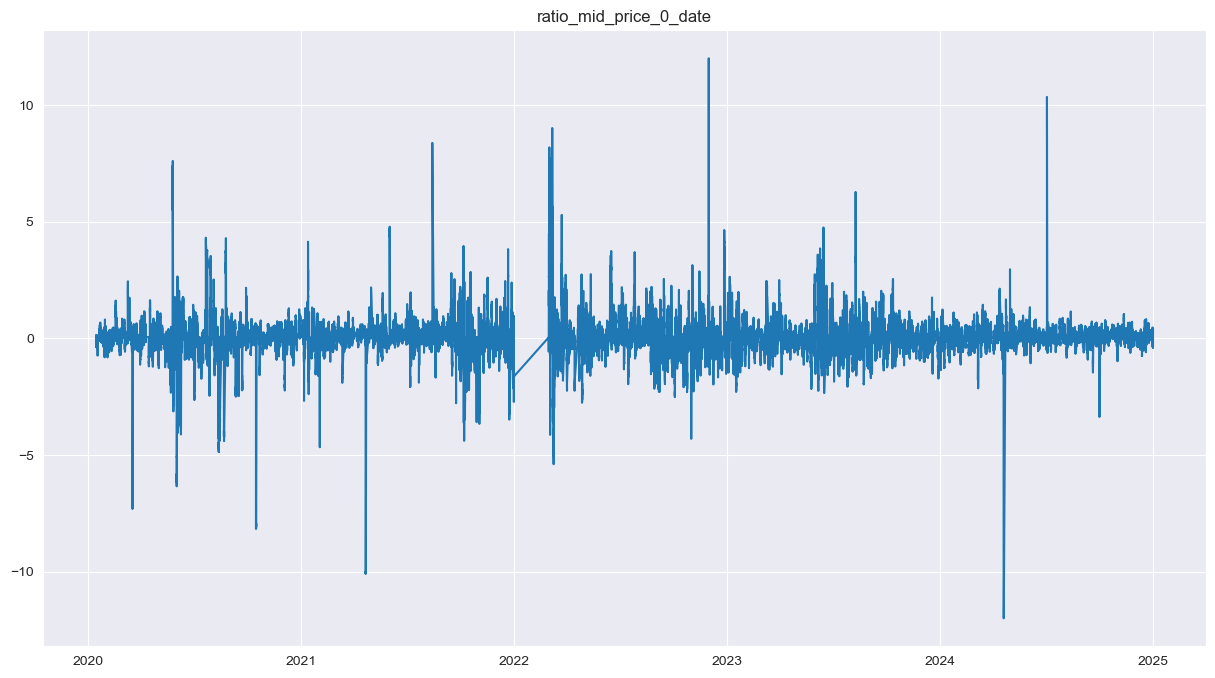

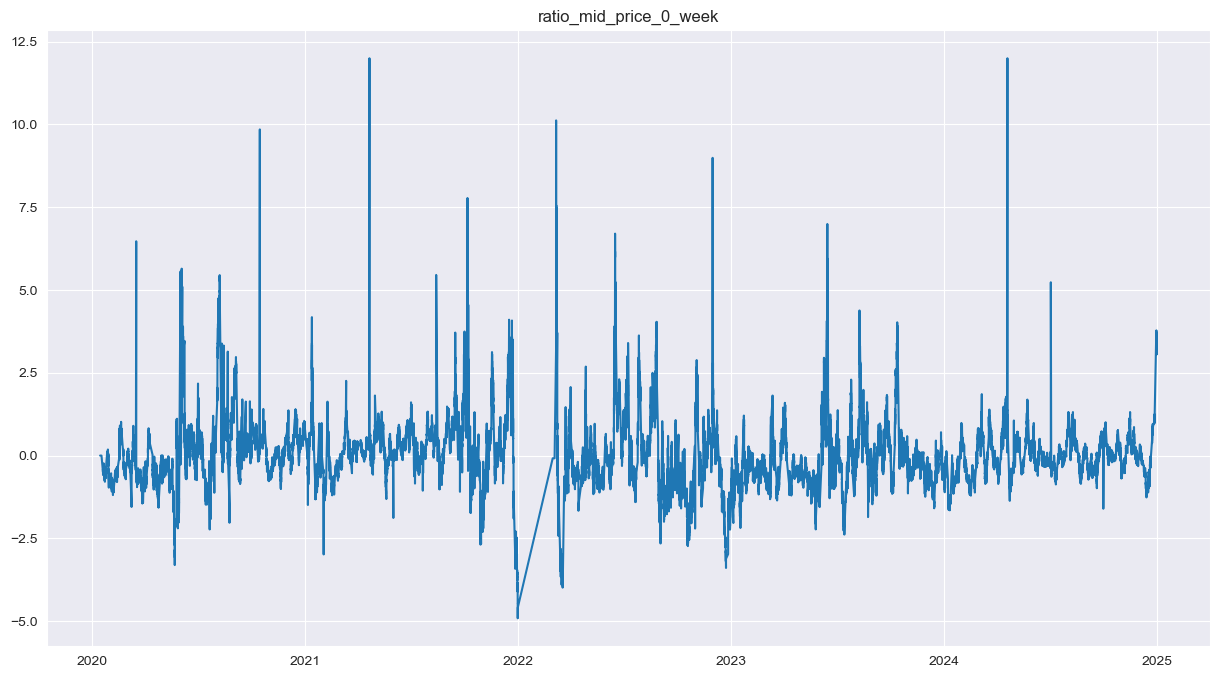

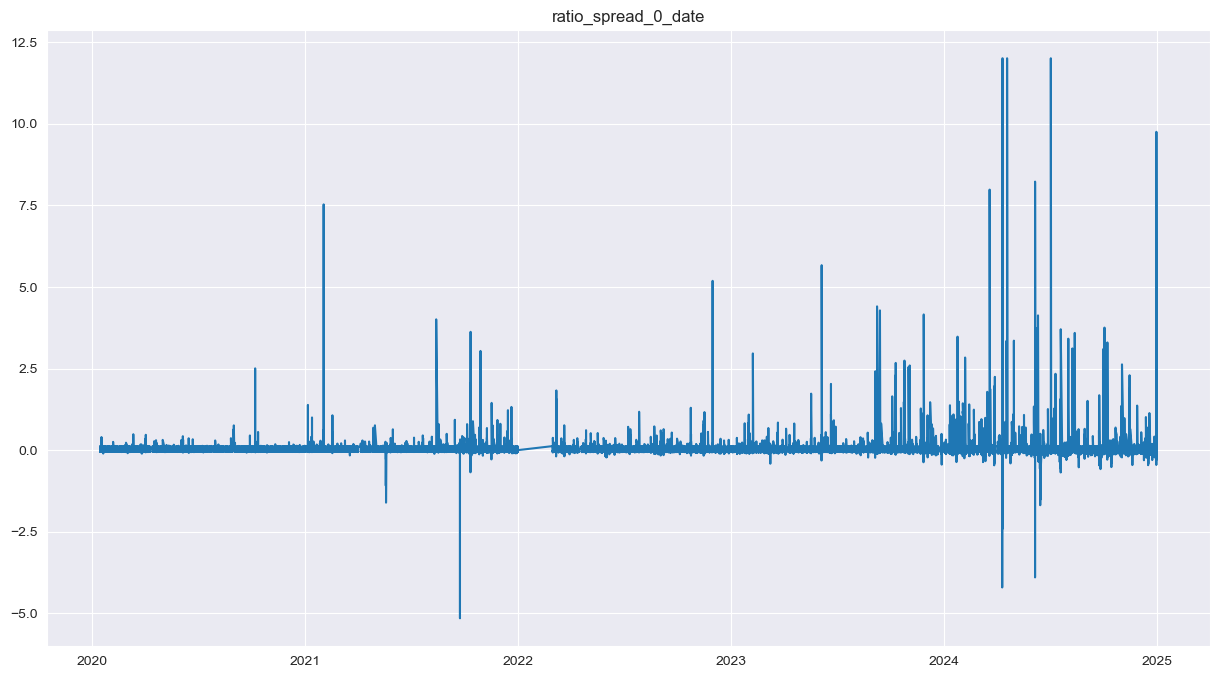

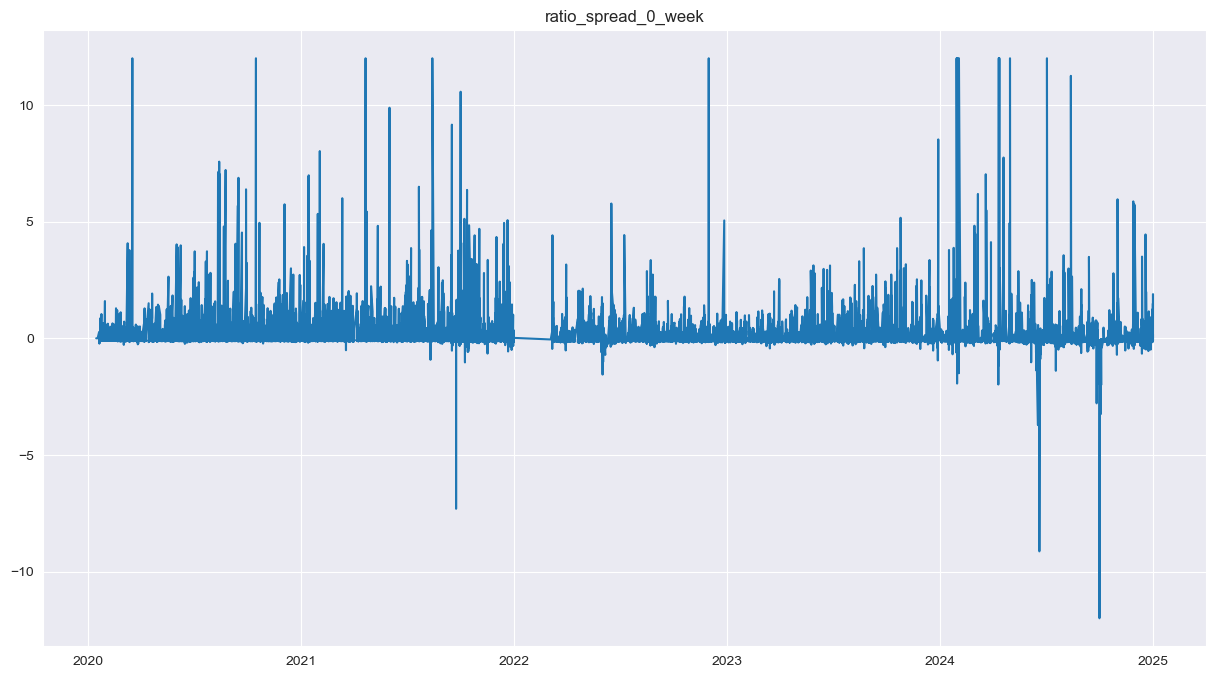

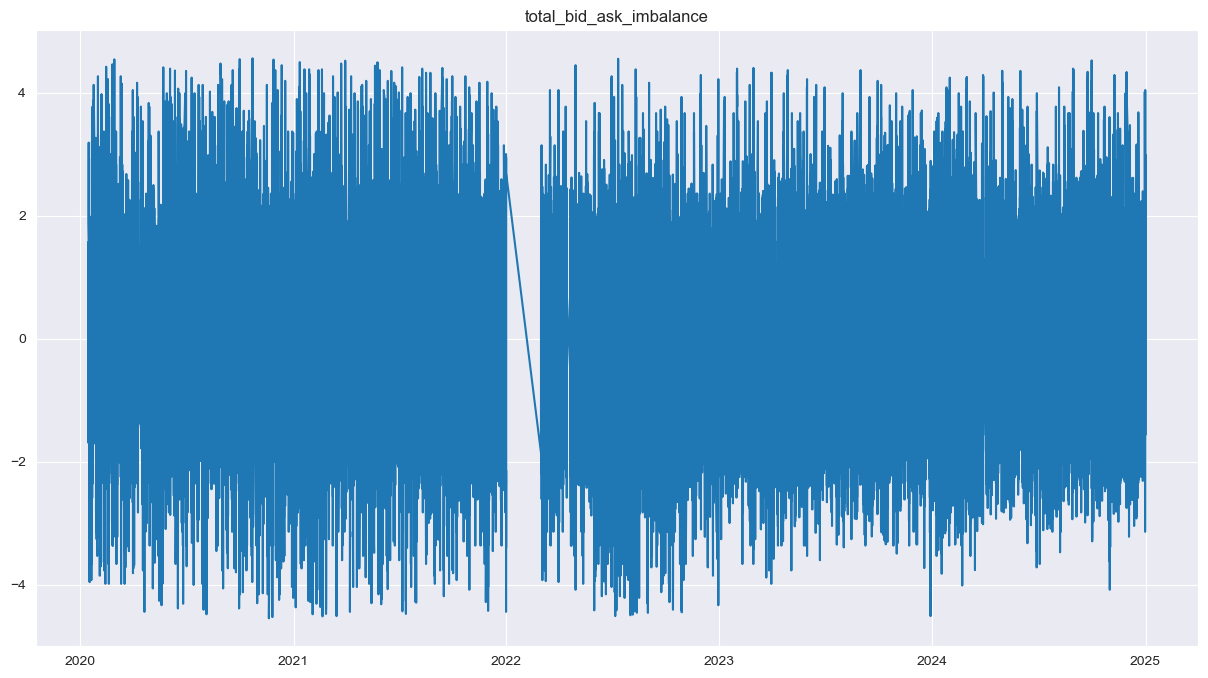

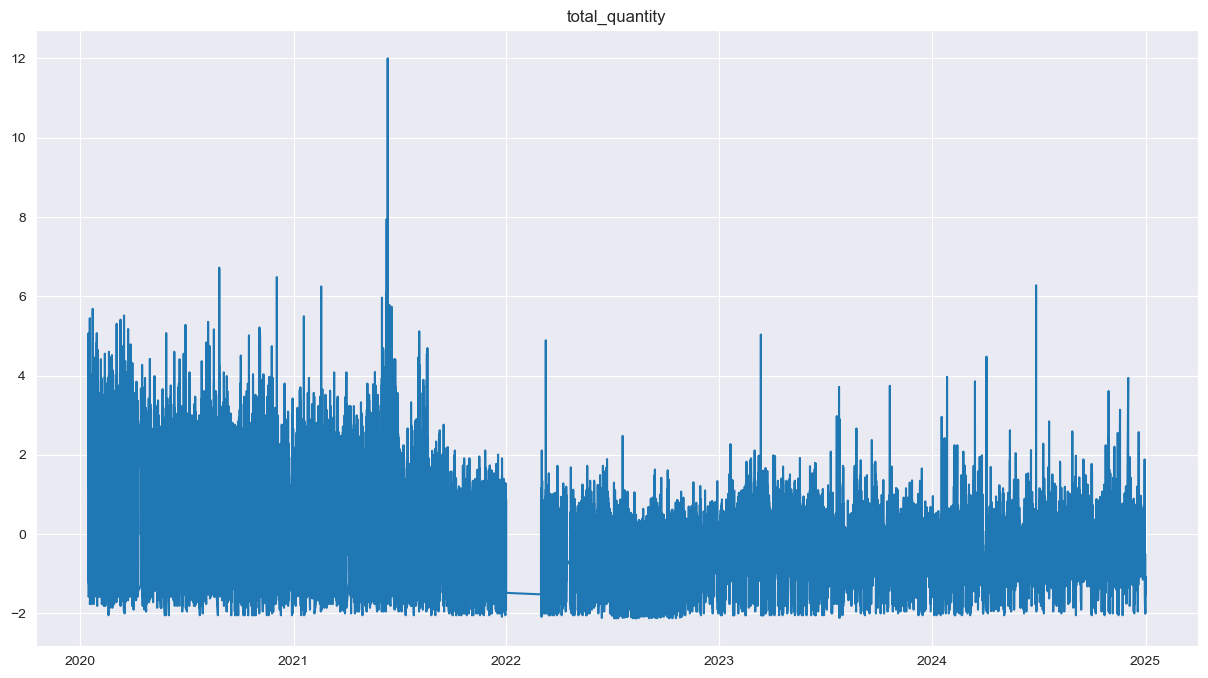

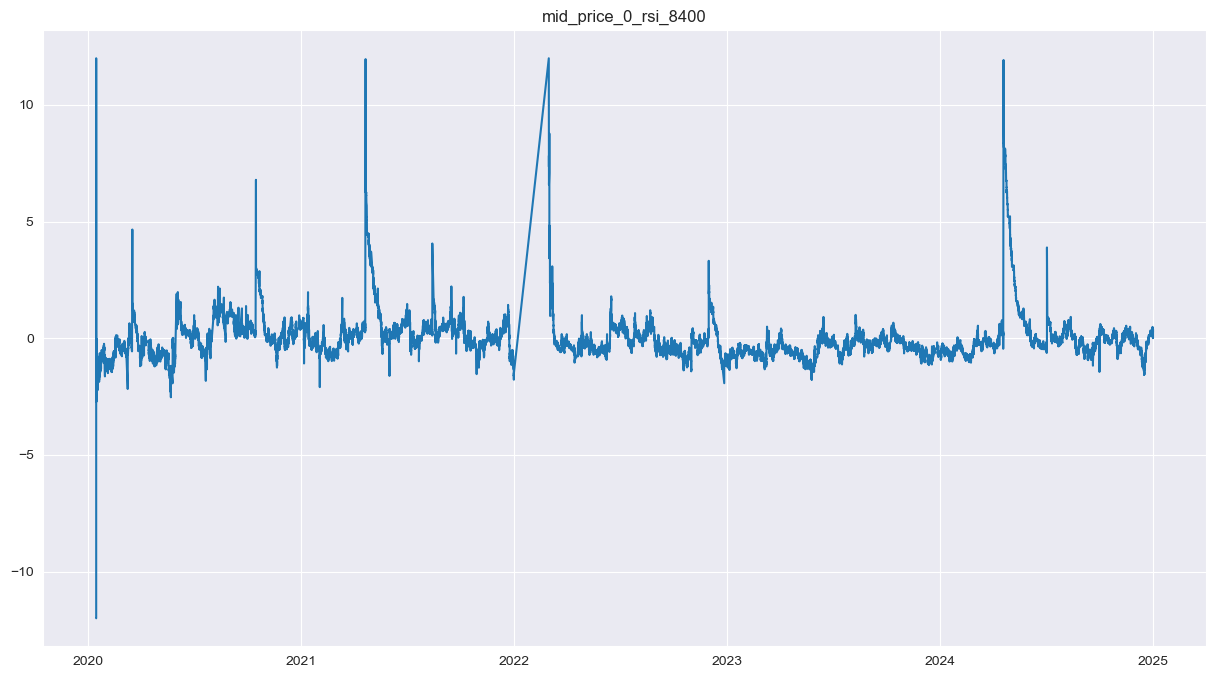

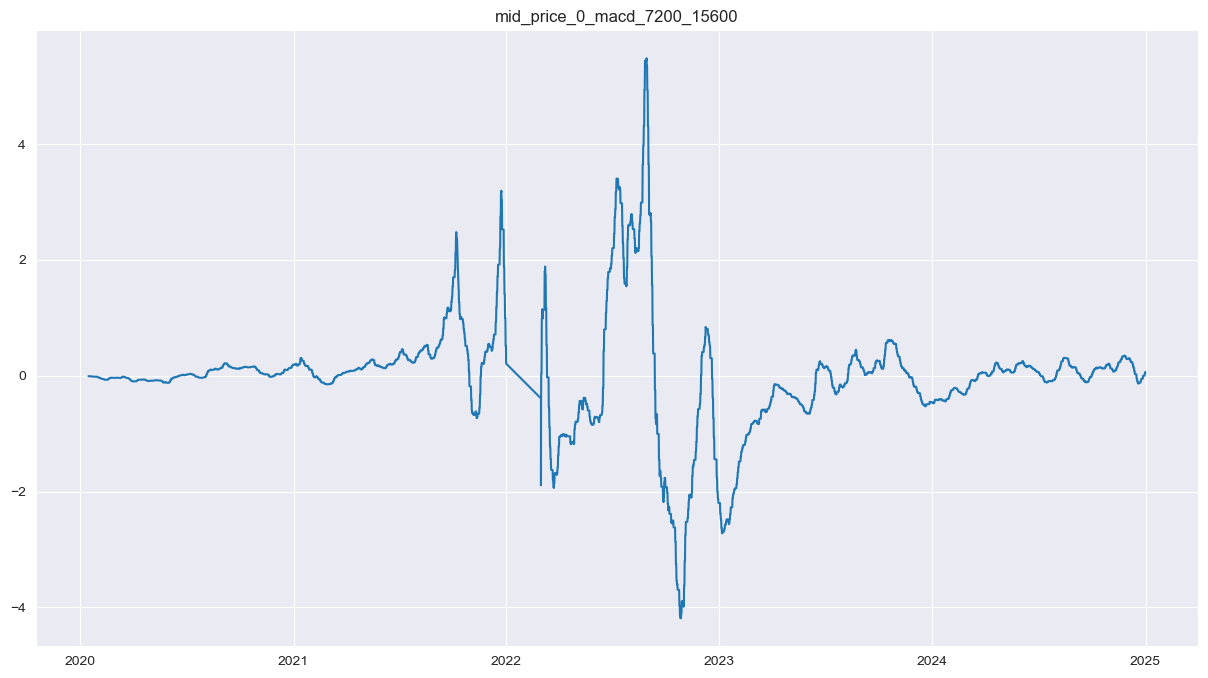

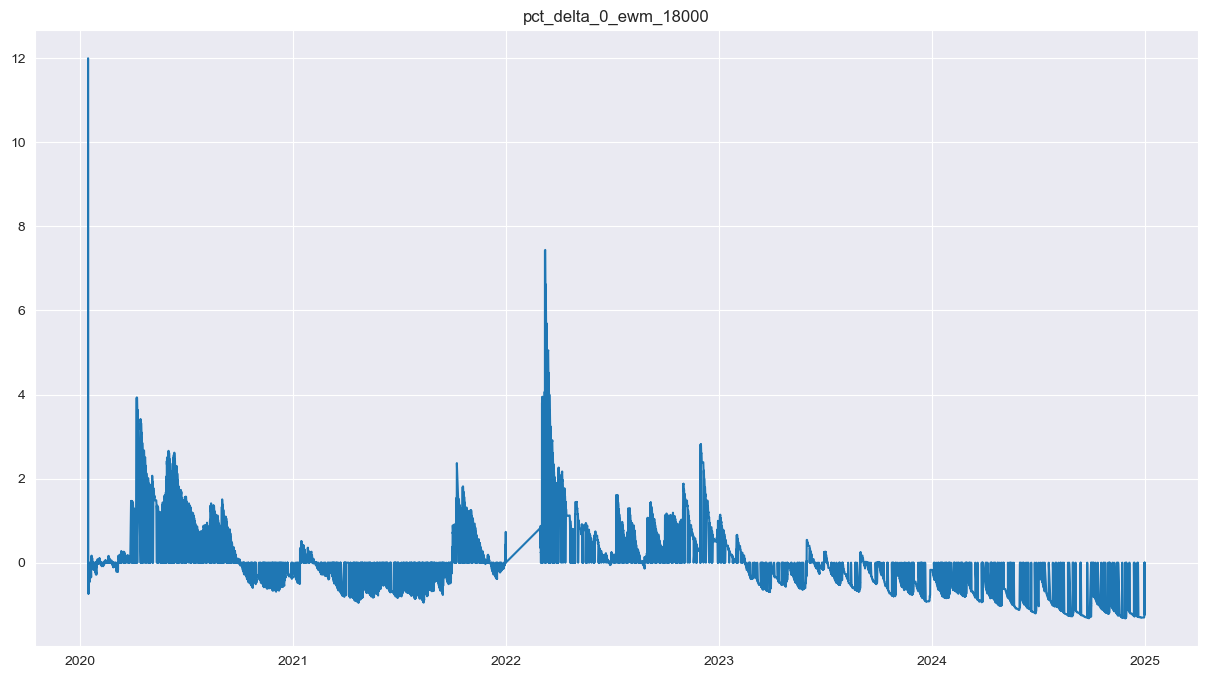

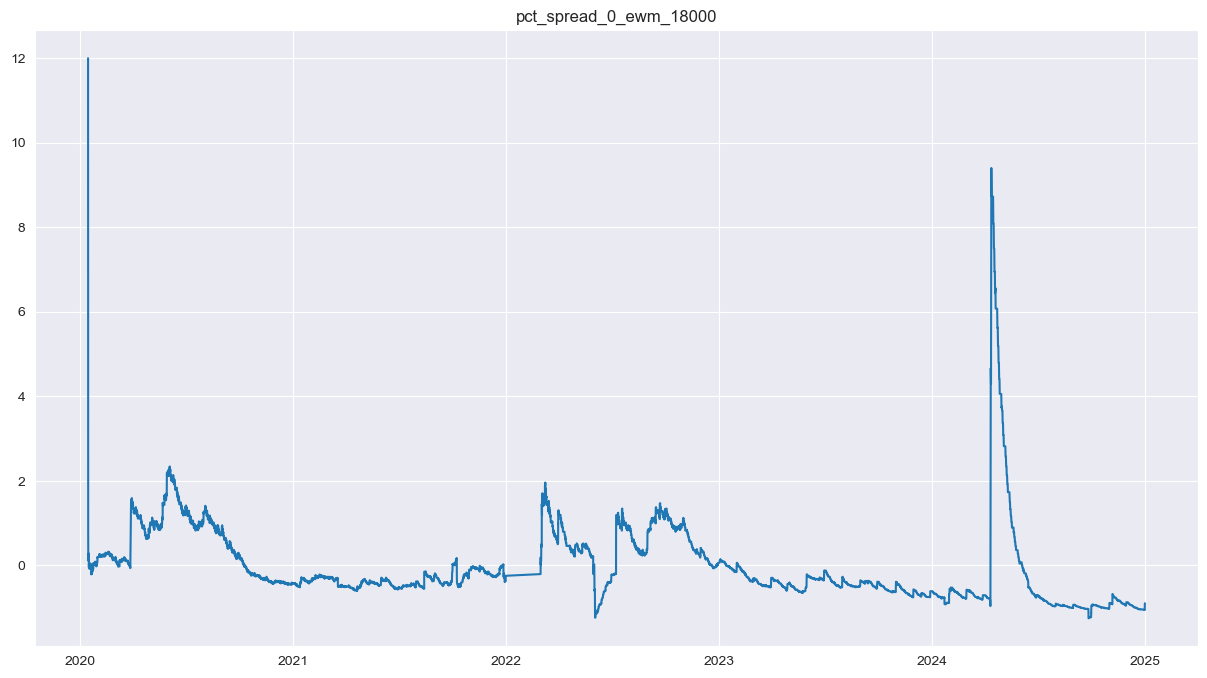

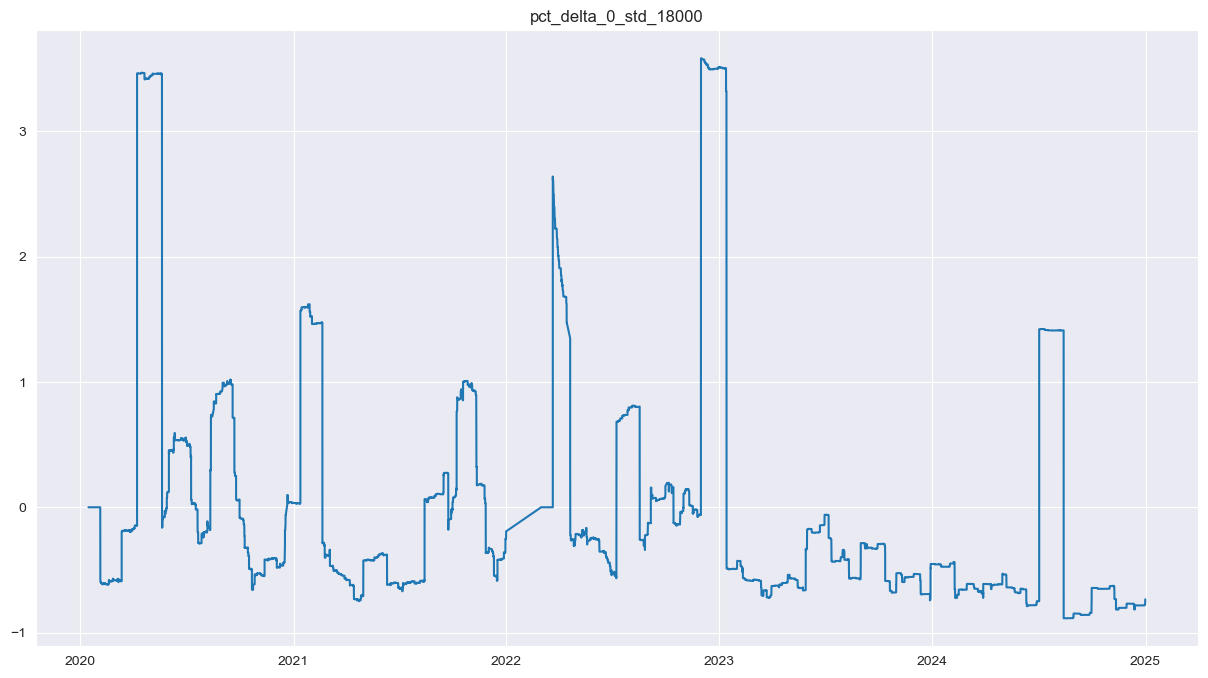

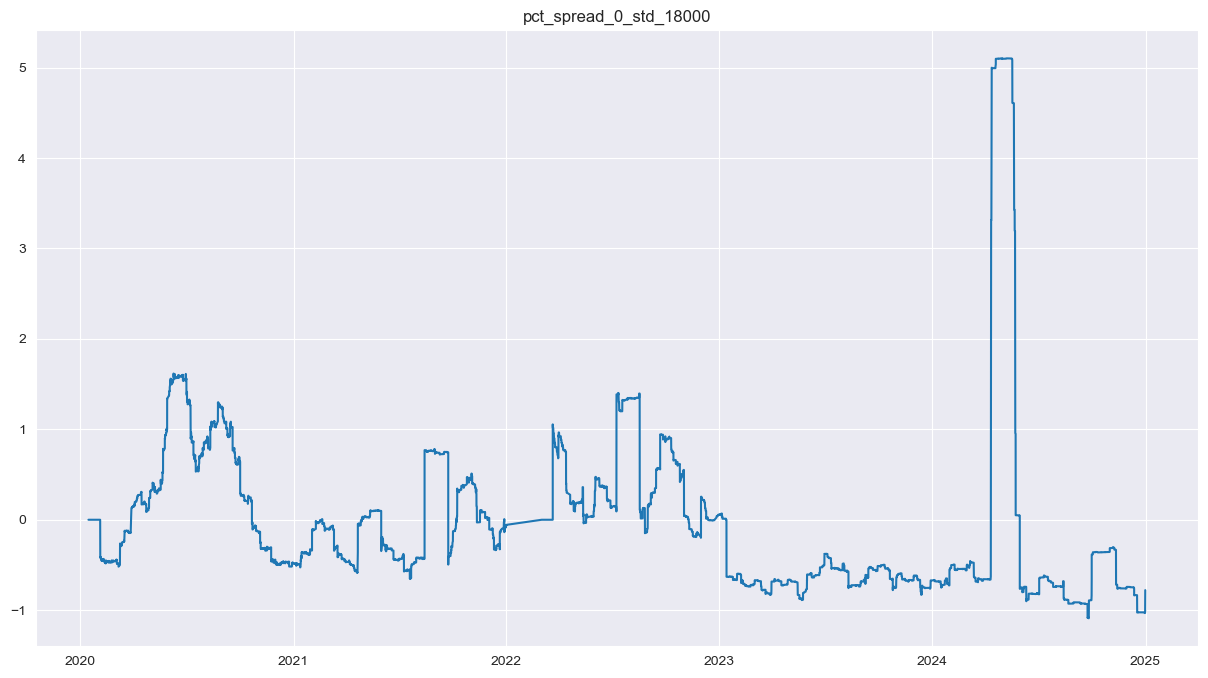

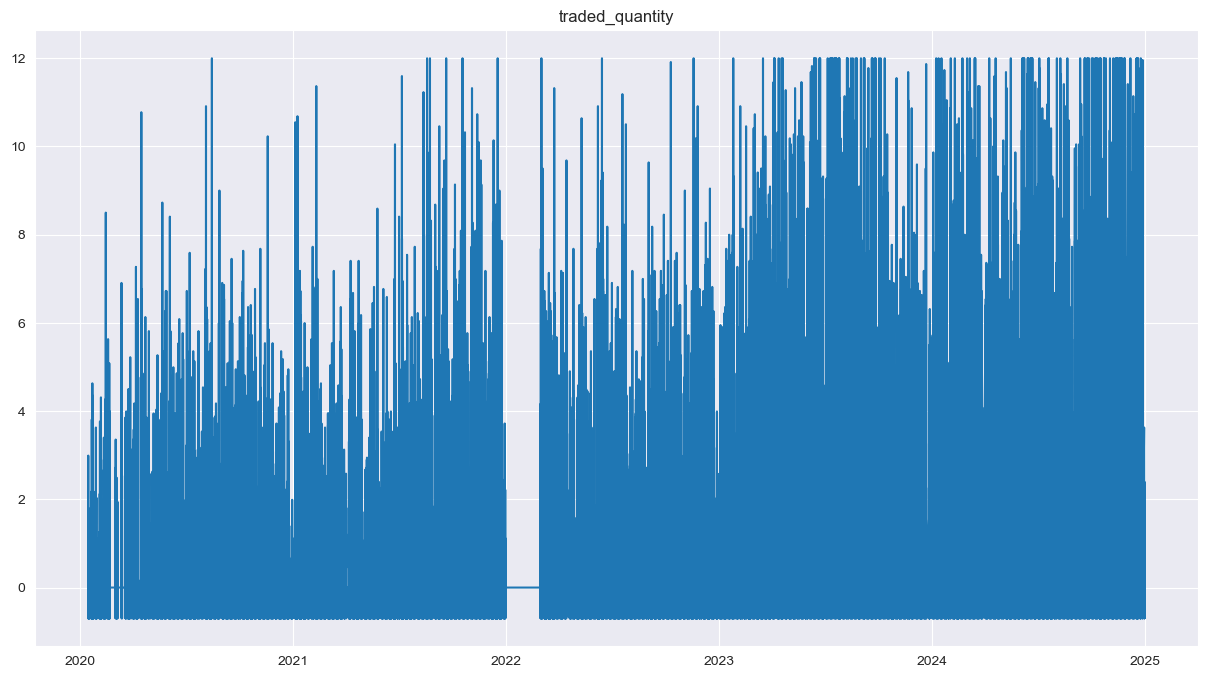

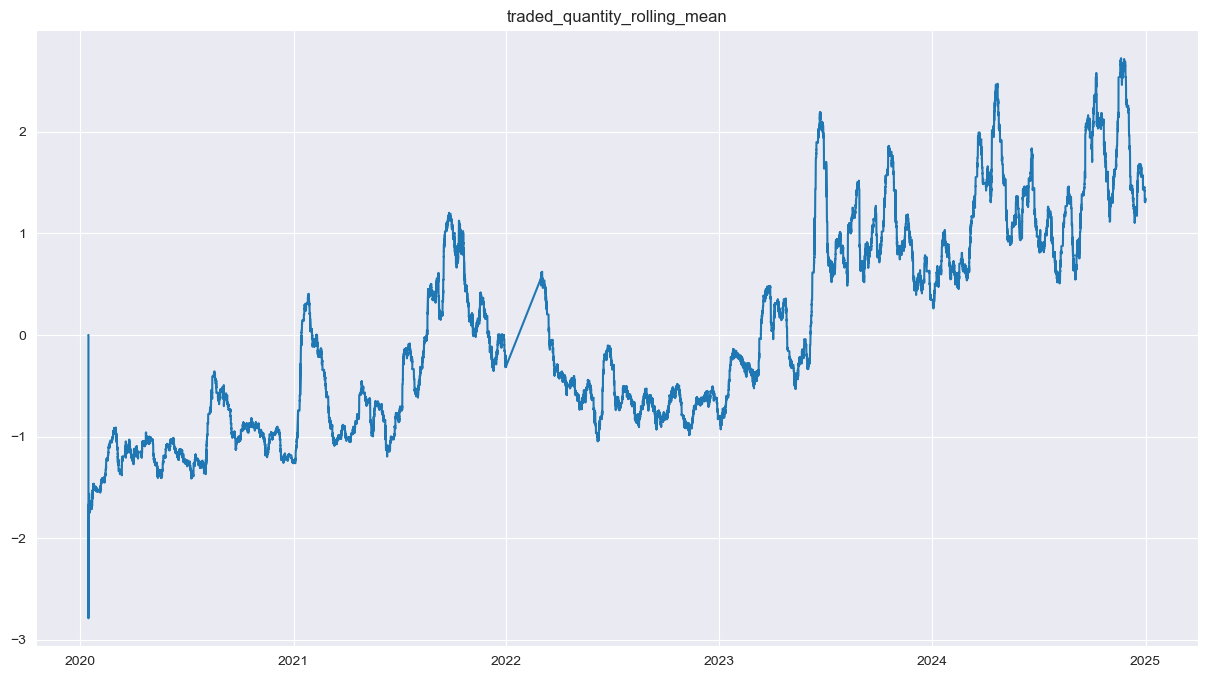

In [65]:
columns = df2.columns

for col in columns:
    plt.figure(figsize=(15,8))
    plt.plot(df['timestamp'], df[col])
    plt.title(col)
    plt.show()

In [ ]:
date = datetime(2020, 1, 16)
df_filtered = df.filter(pl.col('timestamp')<date)
plt.figure(figsize=(15,8))
plt.plot(df_filtered['timestamp'], df_filtered['total_bid_ask_ratio'])
plt.title('total_bid_ask_ratio')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(df_filtered['timestamp'], df_filtered['total_ask_quantity'])
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df['timestamp'], df['mid_price_0_macd_7200_15600'], label='macd', color='blue')
plt.plot(df['timestamp'], df['mid_price_0_macd_signal_7200_15600'], label='signal', color='red')
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(df['timestamp'], df['mid_price_0'])
plt.show()

date = datetime(2020, 1, 22)
plt.figure(figsize=(15, 8))
plt.plot(df.filter(pl.col('timestamp')<date)['timestamp'], df.filter(pl.col('timestamp')<date)['mid_price_0_macd_60_180'], label='macd', color='blue')
plt.plot(df.filter(pl.col('timestamp')<date)['timestamp'], df.filter(pl.col('timestamp')<date)['mid_price_0_macd_signal_60_180'], label='signal', color='red')
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(df.filter(pl.col('timestamp')<date)['timestamp'], df.filter(pl.col('timestamp')<date)['mid_price_0_macd_60_180'] - df.filter(pl.col('timestamp')<date)['mid_price_0_macd_signal_60_180'], label='signal', color='red')
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(df.filter(pl.col('timestamp')<date)['timestamp'], df.filter(pl.col('timestamp')<date)['mid_price_0'])
plt.show()



In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['timestamp'], df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['mid_price_0_rsi_1800'])
plt.show()
plt.figure(figsize=(15,8))
plt.plot(df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['timestamp'], df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['mid_price_0_rsi_4200'])
plt.show()
plt.figure(figsize=(15,8))
plt.plot(df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['timestamp'], df.filter(pl.col('mid_price_0_rsi_1800').sub(0.5).abs() < 0.2)['mid_price_0_rsi_8400'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(df['timestamp'], df['mid_price_0'])
plt.show()